Every ten years, the United Kingdom undertakes a census of the population, with the most recent one having been conducted in 2021. The purpose of the census is to compare different people across the nation, to provide the government with accurate statistics of the population to enable better planning, to develop policies, and to allocate appropriate funding.

__Objectives__\

(a) What should be built on an unoccupied plot of land that the local government wishes to develop? Choices are:\
 - (i) High-density housing: This should be built if the population is significantly expanding.\
    (ii) Low-density housing: This should be built if the population is “affluent” and there is demand for large family housing.\
    (iii) Train station: There are potentially a lot of commuters in the town and building a train station could take pressure off the roads. But how will you identify commuters?\
    (iv) Religious building: There is already one place of worship for Catholics in the town. Is there demand for a second Church (if so, which denomination?), or for a different religious building?\
    (v) Emergency medical building. Not a full hospital, but a minor injuries center. This should be built if there are many injuries or future pregnancies likely in the population.\
    (vi) Something else?

(b) Which one of the following options should be invested in?

 - (i) Employment and training: If there is evidence for a lot of unemployment, we should re-train people for new skills.\
(ii) Old age care: If there is evidence for increasing numbers of retired people in future years, the town will need to allocate more funding for end of life care.\
(iii) Increase spending for schooling: If there is evidence of a growing population of school-aged children (new births, or families moving in to the town), then schooling spend should increase.\
(iv) General infrastructure: If the town is expanding, then services (waste collection; road maintenance, etc.) will require more investment.

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Description of the dataset

In [2]:
#Reading the data

cd = pd.read_csv('census_04.csv', delimiter=',' )
cd.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Prince Lane,Joel,Thompson,38,Head,Divorced,Male,"Teacher, early years/pre",None,Christian
1,1,Prince Lane,Alexandra,Smith,3,Neice,NaN,Female,Child,None,NaN
2,2,Prince Lane,Rachel,Jenkins,40,Head,Single,Female,Radio broadcast assistant,None,Catholic
3,2,Prince Lane,Malcolm,Jenkins,9,Son,NaN,Male,Student,None,NaN
4,3,Prince Lane,Scott,Thompson,20,Head,Married,Male,University Student,None,Christian


In [3]:
#Importing the function
#from pandas_profiling import ProfileReport
#Generate the report. We would use the mpg dataset as sample,
#title parameter for naming our report, and explorative parameter set to True for Deeper exploration.
#profile = ProfileReport(cd, title='cd Pandas Profiling Report', explorative = True)

In [4]:
#Viewing the profile of the dat

import pandas_profiling as pf
pf.ProfileReport(cd).to_file('census_04.csv.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#The missing value of the data

cd.isna().sum()

House Number                        3
Street                              8
First Name                          0
Surname                             5
Age                                 0
Relationship to Head of House      22
Marital Status                   2104
Gender                              1
Occupation                          1
Infirmity                           2
Religion                         2148
dtype: int64

In [6]:
#To check the dataframe type
cd.dtypes

House Number                     object
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [7]:
#checks for the number of times a particular element occurs in a particular list.
cd.count()

House Number                     9096
Street                           9091
First Name                       9099
Surname                          9094
Age                              9099
Relationship to Head of House    9077
Marital Status                   6995
Gender                           9098
Occupation                       9098
Infirmity                        9097
Religion                         6951
dtype: int64

# Data Cleaning

# __Age__

In [8]:
#Using the unique method to get unique values of Age

cd['Age'].unique()


array(['38', '3', '40', '9', '20', '36', '37', '15', '12', '53', '57',
       '32', '82', '87', '47', '48', '74', '67', '8', '4', '5', '65',
       '54', '59', '21', '30', '89', '71', '25', '27', '29', '78', '80',
       '70', '55', '31', '50', '60', '84', '41', '64', '33', '1', '51',
       '26', '35', '61', '19', '22', '34', '43', '45', '58', '44', '42',
       '52', '46', '2', '69', '77', '83', '88', '62', '16', '13', '66',
       '75', '68', '28', '92', '93', '73', '85', '72', '49', '76', '79',
       '0', '81', '18', '14', '10', '6', '17', '24', '11', '63', '39',
       '23', '7', '56', '91', '#######', '99', '86', '69.01411017',
       '74.01411017', '103', '102', '104', '100', '120', '108',
       '51.77661599', '50.77661599', '94', '96', '95', '90',
       '64.20505066', '69.20505066', '98', '101', '0.000000001', '105',
       '97', '111', '47.34815611', '53.96812524', ' '], dtype=object)

In [9]:
#Checking the missing data, the missing value is the head and she is single
cd.loc[cd['Age']== '#######']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
419,26,November Street,Nicole,Smith,#######,Head,Single,Female,Licensed conveyancer,None,None


In [10]:
#Checking the household to check the relationship, it is obvious she stays alone and she isn't related to the other members
cd.loc[cd.index[[417, 418, 419, 420]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
417,24,November Street,Gregory,Bennett,63,None,Single,Male,Firefighter,None,None
418,25,November Street,Kirsty,Andrews,91,Head,Widowed,Female,"Retired Engineer, water",None,Christian
419,26,November Street,Nicole,Smith,#######,Head,Single,Female,Licensed conveyancer,None,None
420,27,November Street,Andrea,George,51,Head,Married,Female,Unemployed,None,Christian


In [11]:
#She is a lodger and she works so it is assume she is an adult
cd.loc[cd['Age']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9035,1,Craig Hold,Holly,Weston,,Lodger,Single,Female,Scientific laboratory technician,None,None


In [12]:
cd.loc[cd.index[[9031, 9032, 9033, 9035, 9036, 9037]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9031,1,Craig Hold,Rosemary,Young-Matthews,15,Daughter,NaN,Female,Student,None,NaN
9032,1,Craig Hold,Suzanne,Young-Matthews,12,Daughter,NaN,Female,Student,None,NaN
9033,1,Craig Hold,Barry,Young-Matthews,8,Son,NaN,Male,Student,None,NaN
9035,1,Craig Hold,Holly,Weston,,Lodger,Single,Female,Scientific laboratory technician,None,None
9036,1,Craig Hold,Jasmine,Stephens,41,Lodger,Single,Female,Adult nurse,None,Christian
9037,1,Owen Lighthouse,Charlotte,Lee,65,Head,Married,Female,"Optician, dispensing",None,Christian


In [13]:
#Replacing '########' and '' to 0 till we get the mean age of the single to replace appropriately
cd["Age"]= cd["Age"].replace('#######', '0')
cd["Age"]= cd["Age"].replace(' ', '0')

In [14]:
#The missing values has been filled
cd['Age'].unique()

array(['38', '3', '40', '9', '20', '36', '37', '15', '12', '53', '57',
       '32', '82', '87', '47', '48', '74', '67', '8', '4', '5', '65',
       '54', '59', '21', '30', '89', '71', '25', '27', '29', '78', '80',
       '70', '55', '31', '50', '60', '84', '41', '64', '33', '1', '51',
       '26', '35', '61', '19', '22', '34', '43', '45', '58', '44', '42',
       '52', '46', '2', '69', '77', '83', '88', '62', '16', '13', '66',
       '75', '68', '28', '92', '93', '73', '85', '72', '49', '76', '79',
       '0', '81', '18', '14', '10', '6', '17', '24', '11', '63', '39',
       '23', '7', '56', '91', '99', '86', '69.01411017', '74.01411017',
       '103', '102', '104', '100', '120', '108', '51.77661599',
       '50.77661599', '94', '96', '95', '90', '64.20505066',
       '69.20505066', '98', '101', '0.000000001', '105', '97', '111',
       '47.34815611', '53.96812524'], dtype=object)

In [15]:
cd['Age'] = cd['Age'].astype(str).astype(float)

In [16]:
cd['Age'].count()

9099

In [17]:
#Change the type of age from str to int

cd['Age'] = cd['Age'].astype(float).astype(int)

In [18]:
cd['Age'].unique()

array([ 38,   3,  40,   9,  20,  36,  37,  15,  12,  53,  57,  32,  82,
        87,  47,  48,  74,  67,   8,   4,   5,  65,  54,  59,  21,  30,
        89,  71,  25,  27,  29,  78,  80,  70,  55,  31,  50,  60,  84,
        41,  64,  33,   1,  51,  26,  35,  61,  19,  22,  34,  43,  45,
        58,  44,  42,  52,  46,   2,  69,  77,  83,  88,  62,  16,  13,
        66,  75,  68,  28,  92,  93,  73,  85,  72,  49,  76,  79,   0,
        81,  18,  14,  10,   6,  17,  24,  11,  63,  39,  23,   7,  56,
        91,  99,  86, 103, 102, 104, 100, 120, 108,  94,  96,  95,  90,
        98, 101, 105,  97, 111])

In [19]:
#Replacing both with the mean of the age single females
cd.loc[[419,9035],'Age'] = 27

In [20]:
#Checking below, we can conclude that they are twins as they have the same set of column, the 0 at the back of the age is an obvious error,so we are fixing it under the age column
cd.loc[cd.index[[2105,2106, 2107, 2108, 2109]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2105,13,Gardner Lane,Derek,O'Neill,10,Son,NaN,Male,Student,None,NaN
2106,14,Gardner Lane,Jemma,Richardson,36,Head,Single,Female,Unemployed,None,None
2107,14,Gardner Lane,Katy,Richardson,120,Daughter,NaN,Female,Student,None,NaN
2108,14,Gardner Lane,Jessica,Richardson,12,Daughter,NaN,Female,Student,None,NaN
2109,15,Gardner Lane,Ellie,King,76,Head,Widowed,Female,Retired Television floor manager,None,Christian


In [21]:
##Replacing the age with age of the other twin
cd.loc[2107,'Age'] = 12

In [22]:
cd['Age'].unique()

array([ 38,   3,  40,   9,  20,  36,  37,  15,  12,  53,  57,  32,  82,
        87,  47,  48,  74,  67,   8,   4,   5,  65,  54,  59,  21,  30,
        89,  71,  25,  27,  29,  78,  80,  70,  55,  31,  50,  60,  84,
        41,  64,  33,   1,  51,  26,  35,  61,  19,  22,  34,  43,  45,
        58,  44,  42,  52,  46,   2,  69,  77,  83,  88,  62,  16,  13,
        66,  75,  68,  28,  92,  93,  73,  85,  72,  49,  76,  79,   0,
        81,  18,  14,  10,   6,  17,  24,  11,  63,  39,  23,   7,  56,
        91,  99,  86, 103, 102, 104, 100, 108,  94,  96,  95,  90,  98,
       101, 105,  97, 111])

# Age Class

In [23]:
x1 = cd['Age']
bins = [0,9,19,29,39,49,59,69,79,89,99,120]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100+']
cd['Age Class']= pd.cut(x1, bins, labels=labels,include_lowest=True)

In [24]:
cd.head(20)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
0,1,Prince Lane,Joel,Thompson,38,Head,Divorced,Male,"Teacher, early years/pre",None,Christian,30-39
1,1,Prince Lane,Alexandra,Smith,3,Neice,NaN,Female,Child,None,NaN,0-9
2,2,Prince Lane,Rachel,Jenkins,40,Head,Single,Female,Radio broadcast assistant,None,Catholic,40-49
3,2,Prince Lane,Malcolm,Jenkins,9,Son,NaN,Male,Student,None,NaN,0-9
4,3,Prince Lane,Scott,Thompson,20,Head,Married,Male,University Student,None,Christian,20-29
5,3,Prince Lane,Diana,Thompson,20,Wife,Married,Female,University Student,None,Christian,20-29
6,4,Prince Lane,Kim,Hunt,36,Head,Married,Female,Information systems manager,None,None,30-39
7,4,Prince Lane,Thomas,Hunt,37,Husband,Married,Male,"Administrator, sports",None,None,30-39
8,4,Prince Lane,Elliot,Hunt,15,Son,NaN,Male,Student,None,NaN,10-19
9,4,Prince Lane,Yvonne,Hunt,12,Daughter,NaN,Female,Student,None,NaN,10-19


In [25]:
#To validate the missing value has been filled

cd['Age'].isna().sum()

0

# __Religion__

In [26]:
cd['Religion'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Christian
1             NaN
2        Catholic
3             NaN
4       Christian
          ...    
9094     Catholic
9095     Catholic
9096     Catholic
9097     Catholic
9098          NaN
Name: Religion, Length: 9099, dtype: object>

In [27]:
#Checking missing value for religion series
cd['Religion'].isna().sum()

2148

In [28]:
#Checking the unique values
cd['Religion'].unique()

array(['Christian', nan, 'Catholic', 'None', 'Methodist', ' ', 'Hindu',
       'Muslim', 'Meth-odist', 'Sikh', 'Undecided', 'Jewish', 'CAtholic',
       'Baptist', 'Orthodoxy', 'Bahai', 'Quaker', 'Jedi'], dtype=object)

In [29]:
#To replace the religion with the mode
cd['Religion'].mode()

0    None
dtype: object

In [30]:
#Convert Religion data type to string to replace nan values
cd['Religion'] = cd['Religion'].astype('str')

In [31]:
#To check numbers of Jedi and replaced them with None
cd.loc[cd['Religion']== 'Jedi']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
8747,26,Taylor Summit,Kim,Green,45,Head,Married,Female,Armed forces operational officer,None,Jedi,40-49
8748,26,Taylor Summit,Ronald,Green,44,Husband,Married,Male,"Editor, commissioning",None,Jedi,40-49


In [32]:
#To check numbers of nan#Most nan categories are children and we can assume they haven't decided which religion they want to ye
cd.loc[cd['Religion']== 'nan']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1,1,Prince Lane,Alexandra,Smith,3,Neice,NaN,Female,Child,None,nan,0-9
3,2,Prince Lane,Malcolm,Jenkins,9,Son,NaN,Male,Student,None,nan,0-9
8,4,Prince Lane,Elliot,Hunt,15,Son,NaN,Male,Student,None,nan,10-19
9,4,Prince Lane,Yvonne,Hunt,12,Daughter,NaN,Female,Student,None,nan,10-19
20,12,Prince Lane,Denis,Tucker,8,Son,NaN,Male,Student,None,nan,0-9
...,...,...,...,...,...,...,...,...,...,...,...,...
9055,1,Repton Ranch,Dylan,Murphy,13,Son,NaN,Male,Student,None,nan,10-19
9056,1,Repton Ranch,Adam,Murphy,11,Son,NaN,Male,Student,None,nan,10-19
9073,1,Fox Palace,Tracey,Austin,1,Daughter,NaN,Female,Child,None,nan,0-9
9092,1,Embassy Manor,Guy,Bryant,15,Son,NaN,Male,Student,None,nan,10-19


In [33]:
#To check numbers of empty strings
cd.loc[cd['Religion']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
54,34,Prince Lane,Anne,Davies,41,Head,Single,Female,"Designer, blown glass/stained glass",None,,40-49
1470,13,Evans Haven,Abbie,Cunningham,40,Wife,Married,Female,Product/process development scientist,None,,40-49
1714,4,Canterbury Prairie,Jade,Mellor,26,Daughter,Divorced,Female,Neurosurgeon,None,,20-29
8199,6,Lyons Glens,Kimberley,Thomas,70,Head,Single,Female,Retired Press sub,None,,70-79


In [34]:
#Checking his age, he is of age to decide his religion so he is termed as 'None' whcih is the mode
cd.loc[cd['Religion']== 'Undecided']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
181,114,Prince Lane,Frances,Barnes,72,Head,Divorced,Female,Retired Advertising art director,None,Undecided,70-79


In [35]:
#Checking his age, he is of age to decide his religion so he is termed as 'None'
cd.loc[181,'Religion'] = 'None'

In [36]:
cd.loc[(cd['Religion']== 'nan') & (cd['Age']<=18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1,1,Prince Lane,Alexandra,Smith,3,Neice,NaN,Female,Child,None,nan,0-9
3,2,Prince Lane,Malcolm,Jenkins,9,Son,NaN,Male,Student,None,nan,0-9
8,4,Prince Lane,Elliot,Hunt,15,Son,NaN,Male,Student,None,nan,10-19
9,4,Prince Lane,Yvonne,Hunt,12,Daughter,NaN,Female,Student,None,nan,10-19
20,12,Prince Lane,Denis,Tucker,8,Son,NaN,Male,Student,None,nan,0-9
...,...,...,...,...,...,...,...,...,...,...,...,...
9055,1,Repton Ranch,Dylan,Murphy,13,Son,NaN,Male,Student,None,nan,10-19
9056,1,Repton Ranch,Adam,Murphy,11,Son,NaN,Male,Student,None,nan,10-19
9073,1,Fox Palace,Tracey,Austin,1,Daughter,NaN,Female,Child,None,nan,0-9
9092,1,Embassy Manor,Guy,Bryant,15,Son,NaN,Male,Student,None,nan,10-19


In [37]:
cd.loc[(cd['Religion']== 'nan') & (cd['Age']>=19)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
2399,9,Guardian Avenue,Joe,Smith,20,Husband,Married,Male,University Student,None,nan,20-29
2710,38,Daisy Road,Antony,James,19,Husband,Married,Male,University Student,None,nan,10-19
3995,84,Dixon Highway,Guy,James,19,None,Single,Male,University Student,None,nan,10-19
4009,89,Dixon Highway,Russell,Taylor,24,Husband,Married,Male,Cabin crew,None,nan,20-29
4826,103,Goldfinch Islands,Martin,Davies,19,Husband,Married,Male,University Student,None,nan,10-19
5112,187,Goldfinch Islands,June,Ryan,28,None,Single,Female,PhD Student,None,nan,20-29
5944,37,Halfcrown Canyon,Barbara,Thomson,19,Wife,Married,Female,University Student,None,nan,10-19
6216,26,Salamander Trafficway,Olivia,Hunt,19,Wife,Married,Female,University Student,None,nan,10-19
6855,25,Newton Road,Adrian,Brennan,20,None,Single,Male,University Student,None,nan,20-29
7463,14,Newcastle Mall,Sam,Iqbal,19,Husband,Married,Male,University Student,None,nan,10-19


In [38]:
#The first set changed to the mode of the religion which is None
#Most nan categories are children and we can assume they don't have a religion yet, so they are changed to Underaged
#Some spelt their religion incorrectly
#Jedi is replaced as they aren't type of religion
#Some categories didn't write anything anything under column, it is assume they don't have a religion so they are been replaced with None
cd.loc[[2399,2710,3995,4826,5112,5944,6216,6855,7463,8563 ],'Religion'] = 'None'
cd["Religion"]= cd["Religion"].replace('CAtholic', 'Catholic')
cd["Religion"]= cd["Religion"].replace('Nope', 'None')
cd["Religion"]= cd["Religion"].replace('nan', 'Underaged')
cd["Religion"]= cd["Religion"].replace('Meth-odist', 'Methodist')
cd["Religion"]= cd["Religion"].replace(' ', 'None')
cd["Religion"]= cd["Religion"].replace('Jedi', 'None')
cd["Religion"]= cd["Religion"].replace(['Catholic','Quaker','Baptist','Methodist','Orthodoxy'], 'Christian')


In [39]:
#Using grouby method to find the mean of the age and religion
religion = cd.groupby('Religion')
religion['Age'].agg([np.mean, np.median])

,mean,median
Religion,,
Bahai,38.500000,38.5
Christian,47.308473,46.0
Hindu,55.000000,55.0
Jewish,49.097561,45.0
Muslim,36.232759,32.0
None,41.296189,39.0
Sikh,34.000000,31.0
Underaged,9.339102,10.0


In [40]:
#To check the missing values has been replaced
cd['Religion'].isna().sum()

0

In [41]:
#To revalidate the unique values 
cd['Religion'].unique()

array(['Christian', 'Underaged', 'None', 'Hindu', 'Muslim', 'Sikh',
       'Jewish', 'Bahai'], dtype=object)

# __Marital Status__

In [42]:
##Checking missing value for Marital Status series

cd['Marital Status'].isna().sum()

2104

In [43]:
##Using the unique method to get unique values of Marital Status
cd['Marital Status'].unique()

array(['Divorced', nan, 'Single', 'Married', 'Widowed', ' ', 'Head',
       'None'], dtype=object)

In [44]:
#Convert Marital Status data type to string to replace nan values
cd['Marital Status'] = cd['Marital Status'].astype('str')

In [45]:
#Check the missing value
cd.loc[cd['Marital Status']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1059,1,Peters Lake,Richard,Duffy,33,Cousin,,Male,Marketing executive,None,None,30-39
4409,8,Goldfinch Avenue,Gillian,Stewart,27,Head,,Female,"Radiographer, diagnostic",None,None,20-29
4410,8,Goldfinch Avenue,Raymond,Stewart,29,Husband,,Male,Unemployed,None,None,20-29


In [46]:
#Checking the data before and after 1059, we can assume he is single because he stayed woth a widower as seen on the same street addreess and house number
cd.loc[cd.index[[1057, 1058, 1059, 1060, 1062]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1057,73,Briggs Forest,Roy,Young,36,Husband,Married,Male,"Designer, industrial/product",None,Christian,30-39
1058,1,Peters Lake,Bruce,Duffy,28,Head,Widowed,Male,"Scientist, biomedical",None,None,20-29
1059,1,Peters Lake,Richard,Duffy,33,Cousin,,Male,Marketing executive,None,None,30-39
1060,1,Peters Lake,Geraldine,Brown,35,Cousin,Single,Female,Water quality scientist,None,None,30-39
1062,3,Peters Lake,Megan,Smith,53,Head,Married,Female,Human resources officer,None,Christian,50-59


In [47]:
#Replacing that with Single because he has another cousin who is single and the head of the house is a widower
cd.loc[1059,'Marital Status'] = 'Single'

In [48]:
##Most nan categories are children and we can assume they are single
cd.loc[cd['Marital Status']== 'nan']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1,1,Prince Lane,Alexandra,Smith,3,Neice,nan,Female,Child,None,Underaged,0-9
3,2,Prince Lane,Malcolm,Jenkins,9,Son,nan,Male,Student,None,Underaged,0-9
8,4,Prince Lane,Elliot,Hunt,15,Son,nan,Male,Student,None,Underaged,10-19
9,4,Prince Lane,Yvonne,Hunt,12,Daughter,nan,Female,Student,None,Underaged,10-19
20,12,Prince Lane,Denis,Tucker,8,Son,nan,Male,Student,None,Underaged,0-9
...,...,...,...,...,...,...,...,...,...,...,...,...
9055,1,Repton Ranch,Dylan,Murphy,13,Son,nan,Male,Student,None,Underaged,10-19
9056,1,Repton Ranch,Adam,Murphy,11,Son,nan,Male,Student,None,Underaged,10-19
9073,1,Fox Palace,Tracey,Austin,1,Daughter,nan,Female,Child,None,Underaged,0-9
9092,1,Embassy Manor,Guy,Bryant,15,Son,nan,Male,Student,None,Underaged,10-19


In [49]:
cd.loc[[1310,1466],'Marital Status'] = 'Single'

In [50]:
cd.loc[cd['Marital Status']== 'None']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
6195,11,Salamander Trafficway,Harriet,Shaw,8,Daughter,None,Female,Student,None,Underaged,0-9


In [51]:
#Considering his age and he is the head we can assume he is married.
cd.loc[cd['Marital Status']== 'Head']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
2914,11,Thomas Wall,Louis,Barton,59,Head,Head,Male,Student Lodge Owner and Operator,None,Christian,50-59


In [52]:
#Checking the relationship of the household.
cd.loc[cd.index[[2912,2913,2914,2915,2916]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
2912,10,Thomas Wall,Lee,Sykes,33,Son,Single,Male,Advice worker,None,None,30-39
2913,10,Thomas Wall,Jamie,Sykes,31,Son,Divorced,Male,Chief of Staff,None,None,30-39
2914,11,Thomas Wall,Louis,Barton,59,Head,Head,Male,Student Lodge Owner and Operator,None,Christian,50-59
2915,11,Thomas Wall,Anne,Gill,18,NaN,Single,Female,University Student,None,None,10-19
2916,11,Thomas Wall,Christopher,Mills,21,NaN,Single,Male,University Student,None,Christian,20-29


In [53]:
#This is to show widows that are below 20
cd.loc[(cd['Marital Status']== 'Widowed') & (cd['Age']<=20)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
2186,33,Gardner Lane,Justin,Johnson,18,Son,Widowed,Male,Student,None,Christian,10-19
3998,85,Dixon Highway,Graham,Kelly,19,Son,Widowed,Male,University Student,None,None,10-19
4042,103,Dixon Highway,Terry,Graham,18,Son,Widowed,Male,Student,None,None,10-19
4862,113,Goldfinch Islands,Anne,Phillips,19,Granddaughter,Widowed,Female,University Student,None,None,10-19
4996,151,Goldfinch Islands,Darren,Richardson,18,Son,Widowed,Male,Student,None,Christian,10-19
5014,157,Goldfinch Islands,Diana,Khan,19,Daughter,Widowed,Female,University Student,None,Christian,10-19
5118,189,Goldfinch Islands,Jemma,Quinn,20,Daughter,Widowed,Female,University Student,None,Christian,20-29
5243,224,Goldfinch Islands,Chloe,Horton,20,Daughter,Widowed,Female,University Student,None,None,20-29


In [54]:
#A closer on above data shows that 
cd.loc[[2186,3998,4042,4862,4996,5014,5118,5243 ],'Marital Status'] = 'Single'

In [55]:
##Most nan categories are children and we can assume underaged to determine their marital status
##Considering his age and he is the head we can assume he is married.
##We have just one None and she is eight years old so we can conclude she is single
cd["Marital Status"]= cd["Marital Status"].replace('nan', 'Single')
cd["Marital Status"]= cd["Marital Status"].replace(' ', 'Married')
cd["Marital Status"]= cd["Marital Status"].replace('Head', 'Married')
cd["Marital Status"]= cd["Marital Status"].replace('None', 'Single')

In [56]:
cd['Marital Status'].unique()

array(['Divorced', 'Single', 'Married', 'Widowed'], dtype=object)

In [57]:
##To check the missing values has been replaced
cd['Marital Status'].isna().sum()

0

# __Relationship to Head of House__

In [58]:
###Checking missing value for Relationship to Head of House series
cd['Relationship to Head of House'].isna().sum()

22

In [59]:
#Convert Marital Status data type to string to replace nan values
cd['Relationship to Head of House'] = cd['Relationship to Head of House'].astype('str')

In [60]:
#To check the unique values 
cd['Relationship to Head of House'].unique()

array(['Head', 'Neice', 'Son', 'Wife', 'Husband', 'Daughter', 'Partner',
       'None', 'Grandson', 'Lodger', 'Granddaughter', 'Cousin', 'Visitor',
       '-', 'Adopted Daughter', 'Step-Daughter', 'Step-Son', 'Nephew',
       'nan', 'Sibling', 'Adopted Son', 'Child', 'Son-in-law', ' ', 'Top',
       'Adopted Grandson'], dtype=object)

In [61]:
#To check the categories of nan
cd.loc[cd['Relationship to Head of House'] == 'nan'] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1043,64,Briggs Forest,Harry,Taylor,81,nan,Divorced,Male,"Retired Therapist, speech and language",None,Christian,80-89
2915,11,Thomas Wall,Anne,Gill,18,nan,Single,Female,University Student,None,None,10-19
2916,11,Thomas Wall,Christopher,Mills,21,nan,Single,Male,University Student,None,Christian,20-29
2917,11,Thomas Wall,Shane,Smith,20,nan,Single,Male,University Student,None,Muslim,20-29
2918,11,Thomas Wall,Bethan,Elliott,21,nan,Single,Female,University Student,None,Christian,20-29
2919,11,Thomas Wall,Janice,Pearce,19,nan,Single,Female,University Student,None,Christian,10-19
2920,11,Thomas Wall,Francis,Rahman,18,nan,Single,Male,University Student,None,Underaged,10-19
2921,11,Thomas Wall,Adrian,Barton,25,nan,Single,Male,PhD Student,None,None,20-29
2922,11,Thomas Wall,Kerry,Dobson,19,nan,Single,Female,University Student,None,None,10-19
2923,11,Thomas Wall,Danielle,Simpson,22,nan,Single,Female,University Student,None,None,20-29


In [62]:
#There is no relationship between the data, we can assume she stays alone at number 64 and she is the head
cd.loc[cd.index[[1042, 1043, 1044, 1045]]]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1042,63,Briggs Forest,Amy,Garner,67,Wife,Married,Female,"Engineer, civil (contracting)",None,Christian,60-69
1043,64,Briggs Forest,Harry,Taylor,81,nan,Divorced,Male,"Retired Therapist, speech and language",None,Christian,80-89
1044,65,Briggs Forest,Jonathan,Wilkinson,55,Head,Single,Male,Oceanographer,None,Christian,50-59
1045,66,Briggs Forest,Glenn,Henderson,52,Head,Single,Male,Legal secretary,None,Christian,50-59


In [63]:
#To replace the column
cd.loc[1043,'Relationship to Head of House'] = 'Head'

In [64]:
#Other people in the nan categories are students, we can assume they lodged.
cd["Relationship to Head of House"]=cd["Relationship to Head of House"].replace('nan', 'Lodgers')

In [65]:
#We have just two empty strings 
cd.loc[cd['Relationship to Head of House']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
2664,23,Daisy Road,Gillian,Oliver,19,,Divorced,Female,University Student,None,None,10-19
7445,9,Newcastle Mall,Clifford,Harper,67,,Married,Male,Radio producer,None,None,60-69


In [66]:
#To check the relationship of the household
cd.loc[cd.index[[2662, 2663, 2664, 2665]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
2662,23,Daisy Road,Jacqueline,Oliver,48,Head,Married,Female,Unemployed,None,None,40-49
2663,23,Daisy Road,Oliver,Oliver,52,Husband,Married,Male,"Accountant, chartered management",None,None,50-59
2664,23,Daisy Road,Gillian,Oliver,19,,Divorced,Female,University Student,None,None,10-19
2665,23,Daisy Road,Terence,Oliver,16,Son,Single,Male,Student,None,Underaged,10-19


In [67]:
#Checking the above dataframe we can conclude she is their daughter as they bear the surname and live together
cd.loc[2664,'Relationship to Head of House'] = 'Daughter'

In [68]:
#To check the relationship of the household
cd.loc[cd.index[[7443, 7444, 7445,7446,7447,7448]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
7443,8,Newcastle Mall,Graeme,Edwards,82,Husband,Married,Male,"Retired Engineer, building services",None,Christian,80-89
7444,9,Newcastle Mall,Carly,Harper,64,Head,Married,Female,Human resources officer,None,None,60-69
7445,9,Newcastle Mall,Clifford,Harper,67,,Married,Male,Radio producer,None,None,60-69
7446,9,Newcastle Mall,Arthur,Harper,37,Son,Single,Male,Actuary,None,None,30-39
7447,9,Newcastle Mall,Olivia,Harper,34,Daughter,Single,Female,"Scientist, forensic",None,None,30-39
7448,10,Newcastle Mall,June,Moore,41,Head,Married,Female,Agricultural consultant,None,Christian,40-49


In [69]:
#Checking above we can conclude he is the husband as they bear the surname
cd.loc[7445,'Relationship to Head of House'] = 'Husband'

In [70]:
#Checking the missing values
cd.loc[cd['Relationship to Head of House']== '-']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
366,8,November Street,Sally,Wright,62,-,Single,Female,Nature conservation officer,None,None,60-69


In [71]:
#To check the relationship of the household
cd.loc[cd.index[[364, 365, 366, 367, 368]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
364,7,November Street,Julia,Hughes,18,None,Single,Female,University Student,None,Christian,10-19
365,8,November Street,Pamela,Parker,46,Head,Single,Female,Nutritional therapist,None,Christian,40-49
366,8,November Street,Sally,Wright,62,-,Single,Female,Nature conservation officer,None,None,60-69
367,8,November Street,Charles,Archer,39,None,Single,Male,"Engineer, mining",None,None,30-39
368,9,November Street,Natasha,Butler,51,Head,Married,Female,Unemployed,None,Christian,50-59


In [72]:
#No relationship between as seen above
cd.loc[366, 'Relationship to Head of House'] = 'None'

In [73]:
#Check the data equals to Top to replace accordingly
cd.loc[cd['Relationship to Head of House']== 'Top']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
3837,22,Dixon Highway,Mitchell,Day,52,Top,Single,Male,Company secretary,None,Christian,50-59


In [74]:
##To check the relationship of the household
cd.loc[cd.index[[ 3837, 3838, 3839, 3840]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
3837,22,Dixon Highway,Mitchell,Day,52,Top,Single,Male,Company secretary,None,Christian,50-59
3838,22,Dixon Highway,Christine,Ward,56,None,Single,Female,Radiation protection practitioner,None,Christian,50-59
3839,22,Dixon Highway,Valerie,Pearson,49,None,Single,Female,Pharmacologist,None,Christian,40-49
3840,23,Dixon Highway,Anthony,North,38,Head,Married,Male,Theme park manager,None,Christian,30-39


In [75]:
#No relationship between as seen above
cd.loc[3837,'Relationship to Head of House'] = 'None'

In [76]:
#Checking the None category and their age if they are minors to classify properly
cd.loc[(cd['Relationship to Head of House']== 'None') & (cd['Age']<18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1488,5,Brown Junctions,Jenna,O'Neill,14,None,Single,Female,Student,None,Underaged,10-19
3000,22,Thomas Wall,Joanna,Watson,4,None,Single,Female,Child,None,Underaged,0-9
4869,114,Goldfinch Islands,Elizabeth,Moore,16,None,Single,Female,Student,None,Underaged,10-19
5329,10,Sunderland Village,Charlie,Richardson,9,None,Single,Male,Student,None,Underaged,0-9


In [77]:
###To check the relationship of the household for 1488
cd.loc[cd.index[[1486,1487,1488,1489]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1486,5,Brown Junctions,Joan,O'Neill,69,None,Married,Female,Retired Actor,None,None,60-69
1487,5,Brown Junctions,Russell,O'Neill,74,None,Married,Male,Retired Curator,None,None,70-79
1488,5,Brown Junctions,Jenna,O'Neill,14,None,Single,Female,Student,None,Underaged,10-19
1489,6,Brown Junctions,Natalie,Evans,73,Head,Married,Female,Retired Chemical engineer,None,Christian,70-79


In [78]:
###To check the relationship of the household for 4869
cd.loc[cd.index[4865:4870]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
4865,114,Goldfinch Islands,Stephanie,White,78,Head,Married,Female,Retired Academic librarian,None,None,70-79
4866,114,Goldfinch Islands,Bradley,White,82,Husband,Married,Male,"Retired Therapist, horticultural",None,None,80-89
4867,114,Goldfinch Islands,Beverley,Moore,51,None,Married,Female,"Research officer, government",None,None,50-59
4868,114,Goldfinch Islands,Connor,Moore,53,None,Married,Male,Records manager,None,None,50-59
4869,114,Goldfinch Islands,Elizabeth,Moore,16,None,Single,Female,Student,None,Underaged,10-19


In [79]:
###To check the relationship of the household for 3000
cd.loc[cd.index[2998:3002]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
2998,22,Thomas Wall,Jill,Watson,26,None,Married,Female,Prison officer,None,None,20-29
2999,22,Thomas Wall,Stuart,Watson,32,None,Married,Male,Interpreter,None,None,30-39
3000,22,Thomas Wall,Joanna,Watson,4,None,Single,Female,Child,None,Underaged,0-9
3001,23,Thomas Wall,Roy,Davies,67,Head,Married,Male,"Journalist, newspaper",None,Christian,60-69


In [80]:
###To check the relationship of the household for 5329
cd.loc[cd.index[5327:5331]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
5327,10,Sunderland Village,Elizabeth,Richardson,49,None,Married,Female,Photographer,None,Christian,40-49
5328,10,Sunderland Village,Dylan,Richardson,48,None,Married,Male,Acupuncturist,None,None,40-49
5329,10,Sunderland Village,Charlie,Richardson,9,None,Single,Male,Student,None,Underaged,0-9
5330,11,Sunderland Village,Paula,Griffiths,38,Head,Divorced,Female,Dance movement psychotherapist,None,None,30-39


In [81]:
#Replacing after checking the relationship
cd.loc[[1488,3000,4869],'Relationship to Head of House'] = 'Daughter'
cd.loc[5329,'Relationship to Head of House'] = 'Son'

In [82]:
#Checking relationship to the head of house that are below 18
cd.loc[(cd['Relationship to Head of House']== 'Head') & (cd['Age']<18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
2709,38,Daisy Road,Josephine,James,17,Head,Married,Female,Student,None,Underaged,10-19
3849,28,Dixon Highway,Gillian,Harrison,17,Head,Single,Female,Student,None,Underaged,10-19
4825,103,Goldfinch Islands,Julie,Davies,16,Head,Married,Female,Student,None,Underaged,10-19
7462,14,Newcastle Mall,Carol,Iqbal,17,Head,Married,Female,Student,None,Underaged,10-19


In [83]:
####To check the relationship of the household
cd.loc[cd.index[[2709,2710, 3849,3850,4825, 4826, 7462,7463]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
2709,38,Daisy Road,Josephine,James,17,Head,Married,Female,Student,None,Underaged,10-19
2710,38,Daisy Road,Antony,James,19,Husband,Married,Male,University Student,None,None,10-19
3849,28,Dixon Highway,Gillian,Harrison,17,Head,Single,Female,Student,None,Underaged,10-19
3850,28,Dixon Highway,Kenneth,Harrison,0,Son,Single,Male,Child,None,Underaged,0-9
4825,103,Goldfinch Islands,Julie,Davies,16,Head,Married,Female,Student,None,Underaged,10-19
4826,103,Goldfinch Islands,Martin,Davies,19,Husband,Married,Male,University Student,None,None,10-19
7462,14,Newcastle Mall,Carol,Iqbal,17,Head,Married,Female,Student,None,Underaged,10-19
7463,14,Newcastle Mall,Sam,Iqbal,19,Husband,Married,Male,University Student,None,None,10-19


In [84]:
#They are been replace as Lodger as they are under 18
cd.loc[[2709,3849,4825,7462],'Relationship to Head of House'] = 'Lodger'

In [85]:
cd['Relationship to Head of House'].unique()

array(['Head', 'Neice', 'Son', 'Wife', 'Husband', 'Daughter', 'Partner',
       'None', 'Grandson', 'Lodger', 'Granddaughter', 'Cousin', 'Visitor',
       'Adopted Daughter', 'Step-Daughter', 'Step-Son', 'Nephew',
       'Sibling', 'Adopted Son', 'Child', 'Son-in-law', 'Lodgers',
       'Adopted Grandson'], dtype=object)

In [86]:
#To check if all missing data have been filled
cd['Relationship to Head of House'].isna().sum()

0

# __Street__

In [87]:
#Checking the missing value
cd['Street'].isna().sum()

8

In [88]:
#Change the type of data to get the nan
cd['Street'] = cd['Street'].astype('str')

In [89]:
#Check for the unique
cd['Street'].unique()

array(['Prince Lane', 'nan', ' ', 'Martin Gardens', 'November Street',
       'Dragonsbag Street', 'Savage Plains', 'Hawkins Roads',
       'Hawkins Rds', 'Bangorfold Lane', 'Briggs Forest', 'Peters Lake',
       'George Drive', 'Ryan Freeway', 'Palmtree Drive', 'Foxglove Loaf',
       'Jackson Avenue', 'Toucan Park', 'Dale Branch', 'Evans Haven',
       'Brown Junctions', 'November Avenue', 'Daisy Street',
       'Sydneypick Drive', 'Pigeon Avenue', 'Leviathan Street',
       'Canterbury Prairie', 'Banktap Road', 'Roberts Street',
       'Gardner Lane', 'Inverness Viaduct', 'Wood Harbors', 'Wharf Road',
       'Guardian Avenue', 'Barker Park', 'Daisy Road', 'Daisy Rd',
       'Morris Plains', 'Thomas Wall', 'Vaughan Roads', 'Pilgrimram Road',
       'Wright Crescent', 'Richards Grove', 'Elizabeth Avenue',
       'Main Lane', 'Metropolispath Lane', 'Testament Groves',
       'Dixon Highway', 'Clark Flats', 'Goldfinch Avenue',
       'Chester Drive', 'Libraknot Street', 'Cumberland Stre

In [90]:
cd['Street'].value_counts()

Goldfinch Islands     769
Dixon Highway         570
Sunderland Village    441
Newton Road           387
Richards Grove        368
                     ... 
Foxglove Hold           5
Storm Delve             4
Daisy Rd                4
Hawkins Rds             3
                        3
Name: Street, Length: 109, dtype: int64

In [91]:
#Check for the missing value under this
cd.loc[cd['Street']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
193,1,,Amanda,Hawkins,71,Head,Married,F,Retired Town planner,None,Christian,70-79
194,1,,Conor,Hawkins,76,Husband,Married,Male,Retired IT consultant,None,Christian,70-79
3430,95,,Irene,Smith,56,Head,Married,Female,Forensic psychologist,None,Christian,50-59


In [92]:
#To check the relationship of the household
cd.loc[cd.index[[193, 194, 195, 192,190,196,197,198]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
193,1,,Amanda,Hawkins,71,Head,Married,F,Retired Town planner,None,Christian,70-79
194,1,,Conor,Hawkins,76,Husband,Married,Male,Retired IT consultant,None,Christian,70-79
195,2,Martin Gardens,Howard,Singh,79,Head,Married,Male,Unemployed,None,None,70-79
192,120,Prince Lane,Natasha,Ashton,15,Daughter,Single,Female,Student,None,Underaged,10-19
190,120,Prince Lane,Sandra,Ashton,49,Head,Married,Female,Tourism officer,None,Christian,40-49
196,2,Martin Gardens,Nicola,Singh,79,Wife,Married,Female,Retired Dentist,None,None,70-79
197,3,Martin Gardens,Kim,Patel,77,Head,Married,Female,Retired Volunteer coordinator,None,Christian,70-79
198,3,Martin Gardens,Reece,Patel,80,Husband,Married,Male,Retired Trade union research officer,None,Christian,80-89


In [93]:
#We were able to establish a relationship above and replace accordingly
cd.loc[193,'Street'] = 'Martin Gardens'
cd.loc[194,'Street'] = 'Martin Gardens'
cd.loc[3430,'Street'] = 'Richards Grove'

In [94]:
#To check the relationship of the household

cd.loc[cd.index[[3430, 3429, 3228, 3431, 3432]]]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
3430,95,Richards Grove,Irene,Smith,56,Head,Married,Female,Forensic psychologist,None,Christian,50-59
3429,94,Richards Grove,Helen,Wilson,32,Head,Single,Female,Immigration officer,None,None,30-39
3228,20,Richards Grove,Marion,Hussain,54,None,Single,Female,"Surveyor, rural practice",None,Christian,50-59
3431,95,Richards Grove,Joel,Smith,60,Husband,Married,Male,Air broker,None,None,60-69
3432,96,Richards Grove,Bethany,Thorpe,52,Head,Single,Female,Bonds trader,None,Christian,50-59


In [95]:
#To check the missing values
cd.loc[cd['Street']== 'nan']


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
118,77,nan,Denis,Clark,31,Head,Single,Male,Airline pilot,None,None,30-39
119,78,nan,Bethan,Brown,44,Head,Married,Female,Transport planner,None,Christian,40-49
120,78,nan,Donald,Brown,43,Husband,Married,Male,Information officer,None,None,40-49
121,78,nan,Ruth,Brown,15,Daughter,Single,Female,Student,None,Underaged,10-19
122,79,nan,Rita,Thompson,37,Head,Married,Female,Oncologist,None,Christian,30-39
123,79,nan,Gregory,Thompson,41,Husband,Married,Male,Mining engineer,None,Christian,40-49
124,79,nan,Jemma,Thompson,12,Daughter,Single,Female,Student,None,Underaged,10-19
125,80,nan,Amelia,Lloyd,30,Head,Single,Female,"Pharmacist, hospital",None,Christian,30-39


In [96]:
#To check the relationship of the household
cd.loc[cd.index[[125, 126, 127, 128,129,130,131,132]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
125,80,nan,Amelia,Lloyd,30,Head,Single,Female,"Pharmacist, hospital",None,Christian,30-39
126,81,Prince Lane,Abdul,Williams,78,Head,Married,Male,Retired Insurance underwriter,None,Christian,70-79
127,81,Prince Lane,Jane,Williams,77,Wife,Married,Female,Retired Museum/gallery exhibitions officer,None,None,70-79
128,82,Prince Lane,Geoffrey,Holmes,83,Head,Widowed,Male,"Retired Engineer, electrical",None,None,80-89
129,83,Prince Lane,Jasmine,Jenkins,88,Head,Widowed,Female,"Retired Engineer, control and instrumentation",None,Muslim,80-89
130,84,Prince Lane,Owen,Lee,62,Head,Single,Male,Transport planner,None,Christian,60-69
131,84,Prince Lane,Marion,Smith,16,Granddaughter,Single,Female,Student,None,Underaged,10-19
132,85,Prince Lane,Georgina,Davies,31,Head,Married,Female,Politician's assistant,None,None,30-39


In [97]:
##We were able to establish a relationship and replace accordingly
cd["Street"]=cd["Street"].replace('nan', 'Prince Lane')


In [98]:
cd['Street'].isna().sum()

0

# __Surname__

In [99]:
##Check for the missing value under this
cd['Surname'].isnull().sum()

5

In [100]:
#Change the data type to get the nan
cd['Surname'] = cd['Surname'].astype('str')

In [101]:
#To check the unique values
cd['Surname'].unique()

array(['Thompson', 'Smith', 'Jenkins', 'Hunt', 'Williams', 'Hooper',
       'French', 'Richards', 'Roberts', 'Ali', 'James', 'Hughes',
       'Tucker', 'Andrews', 'Mann', 'Jones', 'Holmes', 'Howe', 'Giles',
       'Phillips', 'Brown', 'Barker', 'Lewis', 'Morris', 'Chapman',
       'Simpson', 'Patel', 'Davies', 'Hunter', 'Hamilton', 'Hargreaves',
       'West', 'Evans', 'Thomas', 'Frost', 'Warner', 'Baker', 'Byrne',
       'Nicholson', 'Hall', 'Harrison', 'Knowles', 'Campbell', 'Knight',
       'Bentley', 'Harvey', 'Booth', 'Grant', 'George', 'Moss', 'Sims',
       'Stone', 'Bailey', 'Edwards', 'Clarke', 'Howarth', 'Kelly',
       'Pritchard', 'Khan', 'Smth', 'Martin', 'Miles', 'Carr', 'Clark',
       'Read', 'Dobson', 'Burke', 'Stanley', 'Walker', 'Watts', 'Gregory',
       'Kaur', 'Lloyd', 'Lee', 'Graham', 'Adams', 'Flynn', 'Page',
       'Nicholls', 'Benson', 'Nelson', 'Dixon', 'Robertson', 'Clayton',
       'Howell', 'Begum', 'Stevens', 'Turner', 'Mitchell', 'Barry',
       'Carpent

In [102]:
#To check the missing values
cd.loc[cd['Surname']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1368,20,Toucan Park,,,2,Son,Single,Male,Child,None,Underaged,0-9
4192,161,Dixon Highway,Gail,,47,Head,Married,Female,Advertising account planner,None,Christian,40-49
4193,161,Dixon Highway,Gerard,,49,Husband,Married,Male,Historic buildings inspector/conservation officer,None,None,40-49


In [103]:
#To check the household relationship
cd.loc[cd.index[[1365,1368, 1369,4190,4191,4192,4193,4194,4195,4196]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
1365,20,Toucan Park,Melissa,Ford,37,Head,Divorced,Female,Unemployed,None,Christian,30-39
1368,20,Toucan Park,,,2,Son,Single,Male,Child,None,Underaged,0-9
1369,21,Toucan Park,Chloe,Thomas,51,Head,Single,Female,Unemployed,None,Christian,50-59
4190,160,Dixon Highway,Kevin,Brown,72,Head,Married,Male,Retired Company secretary,None,None,70-79
4191,160,Dixon Highway,Josephine,Brown,72,Wife,Married,Female,Retired Furniture conservator/restorer,None,None,70-79
4192,161,Dixon Highway,Gail,,47,Head,Married,Female,Advertising account planner,None,Christian,40-49
4193,161,Dixon Highway,Gerard,,49,Husband,Married,Male,Historic buildings inspector/conservation officer,None,None,40-49
4194,161,Dixon Highway,Leigh,Quinn,16,Son,Single,Male,Sudent,None,Underaged,10-19
4195,161,Dixon Highway,James,Quinn,16,Son,Single,Male,Student,None,Underaged,10-19
4196,161,Dixon Highway,Stuart,Quinn,13,Son,Single,Male,Student,None,Underaged,10-19


In [104]:
#Replace accordingly after establishing a relationship above
cd.loc[1368,'Surname'] = 'Ford'
cd.loc[4192,'Surname'] = 'Quinn'
cd.loc[4193,'Surname'] = 'Quinn'

In [105]:
#Check the missing values
cd.loc[cd['Surname']=='nan']


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
614,24,Dragonsbag Street,Terence,nan,48,Husband,Married,Male,Agricultural consultant,Deaf,Christian,40-49
3169,10,Wright Crescent,Charlene,nan,44,Daughter,Single,Female,"Geneticist, molecular",None,None,40-49
3170,10,Wright Crescent,Edward,nan,41,Son,Single,Male,"Engineer, maintenance",None,Christian,40-49
3171,10,Wright Crescent,Chloe,nan,40,Daughter,Single,Female,Glass blower/designer,None,None,40-49
3172,10,Wright Crescent,Rosie,nan,39,Daughter,Single,Female,Cabin crew,None,Christian,30-39


In [106]:
#To check the household relationship
cd.loc[cd.index[[611,612,613,614,615,616]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
611,23,Dragonsbag Street,Antony,Ahmed,3,Son,Single,Male,Child,None,Underaged,0-9
612,23,Dragonsbag Street,Liam,Ahmed,1,Son,Single,Male,Child,None,Underaged,0-9
613,24,Dragonsbag Street,Denise,Bell,46,Head,Married,Female,Petroleum engineer,None,Christian,40-49
614,24,Dragonsbag Street,Terence,nan,48,Husband,Married,Male,Agricultural consultant,Deaf,Christian,40-49
615,24,Dragonsbag Street,Peter,Bell,21,Son,Single,Male,University Student,None,Christian,20-29
616,24,Dragonsbag Street,Hilary,Bell,18,Daughter,Single,Female,Student,None,Christian,10-19


In [107]:
#Replace according after checking the relationship
cd.loc[614,'Surname'] = 'Bell'

In [108]:
##To check the household relationship
cd.loc[cd.index[[3167,3168,3169,3170, 3171,3172,3173, 3174]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
3167,9,Wright Crescent,Karen,Connor,18,Daughter,Single,Female,Student,None,None,10-19
3168,10,Wright Crescent,Rebecca,Banks,70,Head,Widowed,Female,"Retired Therapist, nutritional",None,Christian,70-79
3169,10,Wright Crescent,Charlene,nan,44,Daughter,Single,Female,"Geneticist, molecular",None,None,40-49
3170,10,Wright Crescent,Edward,nan,41,Son,Single,Male,"Engineer, maintenance",None,Christian,40-49
3171,10,Wright Crescent,Chloe,nan,40,Daughter,Single,Female,Glass blower/designer,None,None,40-49
3172,10,Wright Crescent,Rosie,nan,39,Daughter,Single,Female,Cabin crew,None,Christian,30-39
3173,11,Wright Crescent,Tracy,Tyler,66,Head,Divorced,Female,"Psychologist, counselling",None,Christian,60-69
3174,11,Wright Crescent,William,Tyler,7,Grandson,Single,Male,Student,None,Underaged,0-9


In [109]:
##Replace according after checking the relationship
cd["Surname"]=cd["Surname"].replace('nan', 'Banks')


In [110]:
cd.isnull().sum()

House Number                     3
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           1
Occupation                       1
Infirmity                        2
Religion                         0
Age Class                        0
dtype: int64

# __Gender__


In [111]:
cd['Gender'].unique()

array(['Male', 'Female', 'M', 'F', ' ', 'Ale', nan], dtype=object)

In [112]:
##Check for the missing value under this
cd['Gender'].isnull().sum()

1

In [113]:
#Convert Gender data type to string to replace nan values
cd['Gender'] = cd['Gender'].astype('str')

In [114]:
#Checking nan,she is a daughter so we can conclude she is a female
cd.loc[cd['Gender']=='nan']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
9030,1,Craig Hold,Annette,Young-Matthews,17,Daughter,Single,nan,Student,None,Underaged,10-19


In [115]:
#Checking Ale, he is a son so we can conclude he is a male
cd.loc[cd['Gender']=='Ale']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
8778,32,Taylor Summit,Steven,O'Connor-Burns,22,Son,Single,Ale,University Student,None,None,20-29


In [116]:
cd.loc[cd['Gender']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
548,13,Dragonsbag Street,Philip,Ward,75,Head,Married,,"Retired Designer, television/film set",None,Christian,70-79
549,13,Dragonsbag Street,June,Ward,77,Wife,Married,,Retired Osteopath,None,None,70-79
550,13,Dragonsbag Street,Jack,Ward,15,Grandson,Single,,Student,None,Underaged,10-19
551,13,Dragonsbag Street,Denise,Ward,11,Granddaughter,Single,,Student,None,Underaged,10-19
552,13,Dragonsbag Street,Abdul,Ward,7,Grandson,Single,,Student,None,Underaged,0-9
2815,34,Morris Plains,Barry,Evans,22,Son,Single,,University Student,None,Christian,20-29
3059,32,Thomas Wall,Shaun,Graham,9,Son,Single,,Student,None,Underaged,0-9
4068,115,Dixon Highway,Jane,Nicholls-O'Connor,13,Daughter,Single,,Student,None,Underaged,10-19
4771,83,Goldfinch Islands,Elizabeth,Day,17,Daughter,Single,,Student,None,Underaged,10-19
8493,7,Swansea Avenue,Joan,Garner,9,Daughter,Single,,Student,None,Underaged,0-9


In [117]:
#We can conclude their gender from the relationship to the house and replace appropriately
cd.loc[[548,550,552,2815,3059], 'Gender'] = 'Male'
cd.loc[[549,551,4068,4771,8493], 'Gender'] = 'Female'

In [118]:
#Checking nan,she is a daughter so we can conclude she is a female
#Checking M, We can conclude M is for Male as the short form same as F is for Female
#Checking Ale, he is a son so we can conclude he is a male
#Checking FeMale, she didnt fill it properly
cd["Gender"]=cd["Gender"].replace('nan', 'Female')
cd["Gender"]=cd["Gender"].replace('M', 'Male')
cd["Gender"]=cd["Gender"].replace('F', 'Female')
cd["Gender"]=cd["Gender"].replace('Ale', 'Male')
cd["Gender"]=cd["Gender"].replace('FeMale', 'Female')

In [119]:
#Using grouby method to find the mean of the age by gender and marital status 
cd.groupby(['Gender','Marital Status'])['Age'].mean()

Gender  Marital Status
Female  Divorced          42.772908
        Married           49.843571
        Single            27.224554
        Widowed           68.345972
Male    Divorced          41.591716
        Married           51.970297
        Single            25.757854
        Widowed           67.212329
Name: Age, dtype: float64

In [120]:
cd['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# __Occupation__

In [121]:
#To check the unique values
cd['Occupation'].unique()

array(['Teacher, early years/pre', 'Child', 'Radio broadcast assistant',
       ..., 'Retired Counselling psychologist',
       'Retired Designer, textile', 'Retired Lecturer, further education'],
      dtype=object)

In [122]:
##Check for the missing value under this
cd['Occupation'].isnull().sum()

1

In [123]:
cd['Occupation'].value_counts()

Student                                 1753
University Student                       614
Unemployed                               568
Child                                    465
PhD Student                               27
                                        ... 
Retired Designer, multimedia               1
Retired Freight forwarder                  1
Retired Commissioning editor               1
Retired Administrator, Civil Service       1
Retired Teacher, adult education           1
Name: Occupation, Length: 1096, dtype: int64

In [124]:
#Changing the type of occupation
cd['Occupation'] = cd['Occupation'].astype('str')

In [125]:
cd[cd['Occupation'] == 'PhD Student']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
751,43,Dragonsbag Street,Lynda,Godfrey,25,None,Single,Female,PhD Student,None,Christian,20-29
764,1,Savage Plains,Stuart,James,30,None,Single,Male,PhD Student,None,None,30-39
1415,41,Toucan Park,Grace,Taylor,27,Head,Single,Female,PhD Student,None,None,20-29
1545,2,Daisy Street,Kirsty,Briggs,26,None,Single,Female,PhD Student,None,None,20-29
2835,40,Morris Plains,Mark,Price,31,None,Single,Male,PhD Student,None,Christian,30-39
2921,11,Thomas Wall,Adrian,Barton,25,Lodgers,Single,Male,PhD Student,None,None,20-29
2926,11,Thomas Wall,Ellie,Johnson,25,Lodgers,Single,Female,PhD Student,None,Christian,20-29
3200,5,Richards Grove,Alice,Bishop,30,Head,Single,Female,PhD Student,None,Christian,30-39
3492,119,Richards Grove,Jay,Davies,29,None,Single,Male,PhD Student,None,None,20-29
3511,128,Richards Grove,Victoria,Ellis,32,Head,Single,Female,PhD Student,None,Christian,30-39


In [126]:
#A further check on ages of employed below 18 shows this row the spelling wasn't correct
cd[cd['Occupation'] == 'Sudent']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
4194,161,Dixon Highway,Leigh,Quinn,16,Son,Single,Male,Sudent,None,Underaged,10-19


In [127]:
#This was replaced and corrected.
cd.loc[[4194],'Occupation'] = 'Student'

In [128]:
##A further check on ages of employed below 18 shows this rows was empty
cd[cd['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
4413,9,Goldfinch Avenue,Aaron,Williams,17,Son,Single,Male,,None,Underaged,10-19
5133,193,Goldfinch Islands,Terry,Ward,14,Son,Single,Male,,None,Underaged,10-19


In [129]:
#A further check on household was checked and a relationship was established
cd.loc[cd.index[[4411, 4412,4413, 5133, 5134]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
4411,9,Goldfinch Avenue,Sylvia,Williams,45,Head,Married,Female,"Programmer, systems",None,None,40-49
4412,9,Goldfinch Avenue,Darren,Williams,49,Husband,Married,Male,Charity fundraiser,None,None,40-49
4413,9,Goldfinch Avenue,Aaron,Williams,17,Son,Single,Male,,None,Underaged,10-19
5133,193,Goldfinch Islands,Terry,Ward,14,Son,Single,Male,,None,Underaged,10-19
5134,193,Goldfinch Islands,Rita,Ward,10,Daughter,Single,Female,Student,None,Underaged,10-19


In [130]:
#This was corected as we can conlcude they are students
cd.loc[[4413, 5133],'Occupation'] = 'Student'

In [131]:
#This also shows occupation under NaN category
cd[cd['Occupation'] == 'nan']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class
2634,16,Daisy Road,Philip,West,4,Son,Single,Male,nan,None,Underaged,0-9


In [132]:
#This was also replaced accordingly as the age is of a child
cd.loc[[2634],'Occupation'] = 'Child'

In [133]:
#Using Lamba to split and categorize type of categories under Occupation
cd['Employed'] = cd['Occupation'].apply(lambda x: x.split(" ")[0])

In [134]:
cd.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed
0,1,Prince Lane,Joel,Thompson,38,Head,Divorced,Male,"Teacher, early years/pre",None,Christian,30-39,"Teacher,"
1,1,Prince Lane,Alexandra,Smith,3,Neice,Single,Female,Child,None,Underaged,0-9,Child
2,2,Prince Lane,Rachel,Jenkins,40,Head,Single,Female,Radio broadcast assistant,None,Christian,40-49,Radio
3,2,Prince Lane,Malcolm,Jenkins,9,Son,Single,Male,Student,None,Underaged,0-9,Student
4,3,Prince Lane,Scott,Thompson,20,Head,Married,Male,University Student,None,Christian,20-29,University


In [135]:
#Using def function to categorize types by occupation
def Occupation_Split(a):
    if a == 'Unemployed':
        return 'Unemployed'
    elif a == 'PhD':
        return 'PhD Student'
    elif a == 'Child':
        return 'Child'
    elif a == 'Retired':
        return 'Retired'
    elif  a == 'University':
        return 'University Student'
    elif a == 'Student':
        return 'Student'
    else:
        return 'Employed'

In [136]:
cd['Occupation_Bar'] = cd['Employed'].apply(lambda a: Occupation_Split(a))

In [137]:
cd.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
0,1,Prince Lane,Joel,Thompson,38,Head,Divorced,Male,"Teacher, early years/pre",None,Christian,30-39,"Teacher,",Employed
1,1,Prince Lane,Alexandra,Smith,3,Neice,Single,Female,Child,None,Underaged,0-9,Child,Child
2,2,Prince Lane,Rachel,Jenkins,40,Head,Single,Female,Radio broadcast assistant,None,Christian,40-49,Radio,Employed
3,2,Prince Lane,Malcolm,Jenkins,9,Son,Single,Male,Student,None,Underaged,0-9,Student,Student
4,3,Prince Lane,Scott,Thompson,20,Head,Married,Male,University Student,None,Christian,20-29,University,University Student


In [138]:
##After plotting our plots there are outliers under this category, using a simple code to find out and replace as appropriate
cd[(cd['Occupation_Bar']=='Employed') & (cd['Age']<7)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar


In [139]:
#Checking the relationship between the household
cd.loc[cd.index[[2632,2633,2634,2635,2636]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
2632,16,Daisy Road,James,West,43,Husband,Married,Male,Farm manager,None,Christian,40-49,Farm,Employed
2633,16,Daisy Road,Joshua,West,8,Son,Single,Male,Student,None,Underaged,0-9,Student,Student
2634,16,Daisy Road,Philip,West,4,Son,Single,Male,Child,None,Underaged,0-9,Child,Child
2635,17,Daisy Road,Joshua,May,33,Head,Married,Male,"Pharmacist, hospital",None,Muslim,30-39,"Pharmacist,",Employed
2636,17,Daisy Road,Ann,May,32,Wife,Married,Female,Environmental manager,None,Muslim,30-39,Environmental,Employed


In [140]:
###Using this simple code to replace affected rows
cd.loc[[2634,],'Occupation_Bar'] = 'Child'

In [141]:
#After plotting our plots there are outliers under this category, using a simple code to find out and replace as appropriate
cd[(cd['Occupation_Bar']=='Child') & (cd['Age']> 7)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
598,21,Dragonsbag Street,Janet,Ward,34,None,Single,Female,Child psychotherapist,None,Christian,30-39,Child,Child
953,5,Briggs Forest,Brett,Harvey,49,Husband,Married,Male,Child psychotherapist,Physical Disability,None,40-49,Child,Child
1428,46,Toucan Park,Jessica,Herbert,60,Head,Married,Female,Child psychotherapist,None,Christian,60-69,Child,Child
2493,50,Guardian Avenue,Patrick,Brown,59,Husband,Married,Male,Child psychotherapist,None,None,50-59,Child,Child
8889,15,Horse Avenue,Bethany,Anderson,59,Partner,Single,Female,Child psychotherapist,None,None,50-59,Child,Child


In [142]:
#Using this simple code to replace affected rows
cd.loc[[598,953,1428,2493,8889],'Occupation_Bar'] = 'Employed'

In [143]:
#After plotting our plots there are outliers under this category, using a simple code to find out and replace as appropriate
cd[(cd['Occupation_Bar']=='Student') & (cd['Age']> 40)]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
2914,11,Thomas Wall,Louis,Barton,59,Head,Married,Male,Student Lodge Owner and Operator,None,Christian,50-59,Student,Student


In [144]:
cd.loc[[2914],'Occupation_Bar'] = 'Employed'

In [145]:
#Checking below, we can conclude that they are twins as they have the same set of column, the 0 at the back of the age is an obvious error,so we are fixing it under the age column
cd.loc[cd.index[[2105,2106, 2107, 2108, 2109]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
2105,13,Gardner Lane,Derek,O'Neill,10,Son,Single,Male,Student,None,Underaged,10-19,Student,Student
2106,14,Gardner Lane,Jemma,Richardson,36,Head,Single,Female,Unemployed,None,None,30-39,Unemployed,Unemployed
2107,14,Gardner Lane,Katy,Richardson,12,Daughter,Single,Female,Student,None,Underaged,10-19,Student,Student
2108,14,Gardner Lane,Jessica,Richardson,12,Daughter,Single,Female,Student,None,Underaged,10-19,Student,Student
2109,15,Gardner Lane,Ellie,King,76,Head,Widowed,Female,Retired Television floor manager,None,Christian,70-79,Retired,Retired


In [146]:
##Using this simple code to replace affected rows
cd.loc[[2107,],'Occupation_Bar'] = 'Employed'

In [147]:
cd['Occupation_Bar'].unique()

array(['Employed', 'Child', 'Student', 'University Student', 'Unemployed',
       'Retired', 'PhD Student'], dtype=object)

In [148]:
#unemployed = cd[cd['Occupation'] == 'Unemployed']
#unemployed.head()

In [149]:
#di = cd[cd['Age'].between(20,50)]
#len(di)

In [150]:
unemployed = cd[cd['Occupation_Bar'] == 'Unemployed']
unemployed['Age Class'].value_counts()

30-39    146
40-49    145
50-59    101
20-29     95
60-69     64
70-79      9
80-89      7
10-19      1
0-9        0
90-99      0
100+       0
Name: Age Class, dtype: int64

# __House Number__

In [151]:
#Using the unique method to check
cd['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', ' ',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
       '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
       '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101',
       '102', '103', '104', '105', '106', '107', '108', '109', '110',
       '111', '112', '113', '114', '115', '116', '117', '118', '119',
       '120', '13', nan, '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143',

In [152]:
#Changing the type of data to get the nan and empty string
cd['House Number'] = cd['House Number'].astype('str')

In [153]:
#Checking Missing Data
cd.loc[cd['House Number']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
22,,Prince Lane,Rhys,Andrews,67,Head,Widowed,Male,Automotive engineer,None,Christian,60-69,Automotive,Employed
3815,,Dixon Highway,Suzanne,Harding,68,Head,Married,Female,Retired Land/geomatics surveyor,None,Christian,60-69,Retired,Retired
7640,,Storm Drive,Katherine,Naylor,11,Daughter,Single,Female,Student,None,Underaged,10-19,Student,Student


In [154]:
#To check the relationship of the households
cd.loc[cd.index[[20, 21,22,23,24,25,3814,3815,3816,7635,7636, 7637,7638,7639,7640,7641]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
20,12,Prince Lane,Denis,Tucker,8,Son,Single,Male,Student,None,Underaged,0-9,Student,Student
21,12,Prince Lane,Roger,Tucker,4,Son,Single,Male,Child,None,Underaged,0-9,Child,Child
22,,Prince Lane,Rhys,Andrews,67,Head,Widowed,Male,Automotive engineer,None,Christian,60-69,Automotive,Employed
23,14,Prince Lane,Maureen,Ali,40,Head,Single,Female,Dispensing optician,None,Christian,40-49,Dispensing,Employed
24,14,Prince Lane,Samantha,Ali,5,Daughter,Single,Female,Student,None,Underaged,0-9,Student,Student
25,15,Prince Lane,Gregory,Mann,65,Head,Widowed,Male,Catering manager,None,Christian,60-69,Catering,Employed
3814,10,Dixon Highway,Roger,Collins,8,Son,Single,Male,Student,None,Underaged,0-9,Student,Student
3815,,Dixon Highway,Suzanne,Harding,68,Head,Married,Female,Retired Land/geomatics surveyor,None,Christian,60-69,Retired,Retired
3816,11,Dixon Highway,Declan,Harding,74,Husband,Married,Male,"Retired Surveyor, building",None,Christian,70-79,Retired,Retired
7635,3,Storm Drive,Adam,Robinson,17,Son,Single,Male,Student,None,Underaged,10-19,Student,Student


In [155]:
cd.loc[cd['House Number']=='nan']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
2544,nan,Barker Park,Bethan,Archer,38,Wife,Married,Female,Best boy,None,Christian,30-39,Best,Employed
7638,nan,Storm Drive,Lesley,Naylor,38,Head,Married,Female,Hotel manager,None,None,30-39,Hotel,Employed
7639,nan,Storm Drive,Duncan,Naylor,46,Husband,Married,Male,Environmental consultant,None,None,40-49,Environmental,Employed


In [156]:
cd.loc[cd.index[[2542,2543,2544]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
2542,12,Barker Park,Lesley,Reid,69,Wife,Married,Female,Retired Press sub,None,None,60-69,Retired,Retired
2543,13,Barker Park,Oliver,Archer,42,Head,Married,Male,Education administrator,None,Christian,40-49,Education,Employed
2544,nan,Barker Park,Bethan,Archer,38,Wife,Married,Female,Best boy,None,Christian,30-39,Best,Employed


In [157]:
cd.loc[cd['House Number']=='Z']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
8473,Z,Swansea Avenue,Tom,Davey,38,Head,Married,Male,Midwife,None,Christian,30-39,Midwife,Employed
8474,Z,Swansea Avenue,Bethany,Davey,38,Wife,Married,Female,Actuary,None,Christian,30-39,Actuary,Employed


In [158]:
cd.loc[cd.index[[8471,8472,8473,8474,8475,8476]]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
8471,1,Swansea Avenue,Ann,Johnson,63,None,Single,Female,"Scientist, research (maths)",None,None,60-69,"Scientist,",Employed
8472,1,Swansea Avenue,Justin,Elliott,37,None,Single,Male,Chartered certified accountant,None,Christian,30-39,Chartered,Employed
8473,Z,Swansea Avenue,Tom,Davey,38,Head,Married,Male,Midwife,None,Christian,30-39,Midwife,Employed
8474,Z,Swansea Avenue,Bethany,Davey,38,Wife,Married,Female,Actuary,None,Christian,30-39,Actuary,Employed
8475,3,Swansea Avenue,Janice,Booth,64,Head,Married,Female,Unemployed,None,None,60-69,Unemployed,Unemployed
8476,3,Swansea Avenue,Barry,Booth,63,Husband,Married,Male,Chief of Staff,None,None,60-69,Chief,Employed


In [159]:
#We were able establish relationship to the house and replace accordingly
cd.loc[22, 'House Number'] = 13
cd.loc[3815, 'House Number'] = 11
cd.loc[[7638,7639,7640],'House Number'] = 5
cd.loc[[2544],'House Number'] = 13
cd.loc[[8473,8474],'House Number'] = 13

In [160]:

#To replace type of data as house number should be an integer
cd['House Number'] = cd['House Number'].astype('int')

In [161]:
cd['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [162]:
cd.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        2
Religion                         0
Age Class                        0
Employed                         0
Occupation_Bar                   0
dtype: int64

# __Infirmity__

In [163]:
cd['Infirmity'] = cd['Infirmity'].astype('str')

In [164]:
cd['Infirmity'].unique()

array(['None', 'Disabled', 'Deaf', 'Physical Disability', 'nan',
       'Mental Disability', ' ', 'Blind', 'Unknown Infection'],
      dtype=object)

In [165]:
cd.loc[cd['Infirmity']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
799,6,Hawkins Roads,Rachael,Cole,49,Wife,Married,Female,Unemployed,,Christian,40-49,Unemployed,Unemployed
1106,6,Ryan Freeway,Natalie,Stephenson,36,Head,Married,Female,"Psychologist, educational",,Christian,30-39,"Psychologist,",Employed
2299,7,Inverness Viaduct,Daniel,Patel,33,None,Single,Male,Minerals surveyor,,None,30-39,Minerals,Employed
4110,134,Dixon Highway,Jessica,Hilton,61,Head,Married,Female,Sports therapist,,Christian,60-69,Sports,Employed
4444,7,Chester Drive,Shirley,Griffiths,19,Daughter,Single,Female,University Student,,None,10-19,University,University Student
5996,10,Anderson Avenue,Denise,Burns,31,Head,Divorced,Female,Herpetologist,,None,30-39,Herpetologist,Employed
6890,38,Newton Road,Jacqueline,Jones,20,Daughter,Single,Female,University Student,,Jewish,20-29,University,University Student
8185,13,Unity Freeway,Jeremy,Morrison,23,Head,Single,Male,Corporate treasurer,,None,20-29,Corporate,Employed
8538,17,Swansea Avenue,Declan,Lynch-Harris,16,Son,Single,Male,Student,,Underaged,10-19,Student,Student


In [166]:
cd.loc[cd['Infirmity']=='nan']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Class,Employed,Occupation_Bar
329,53,Martin Gardens,Lee,Lowe,34,Head,Single,Male,Unemployed,nan,None,30-39,Unemployed,Unemployed
2326,14,Inverness Viaduct,Jill,Brown,50,Head,Married,Female,Sports coach,nan,None,50-59,Sports,Employed


In [167]:
#Majority of the population are None so they have been replaced
cd["Infirmity"]=cd["Infirmity"].replace(' ', 'None')
cd["Infirmity"]=cd["Infirmity"].replace('nan', 'None')

In [168]:
cd.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Age Class                        0
Employed                         0
Occupation_Bar                   0
dtype: int64

In [169]:
cd.dtypes

House Number                        int32
Street                             object
First Name                         object
Surname                            object
Age                                 int32
Relationship to Head of House      object
Marital Status                     object
Gender                             object
Occupation                         object
Infirmity                          object
Religion                           object
Age Class                        category
Employed                           object
Occupation_Bar                     object
dtype: object

In [170]:
cd.count()

House Number                     9099
Street                           9099
First Name                       9099
Surname                          9099
Age                              9099
Relationship to Head of House    9099
Marital Status                   9099
Gender                           9099
Occupation                       9099
Infirmity                        9099
Religion                         9099
Age Class                        9099
Employed                         9099
Occupation_Bar                   9099
dtype: int64

# __Data Visualization__

# __Age Distribution By Gender__

Text(0.5, 1.0, 'Distribution of Age')

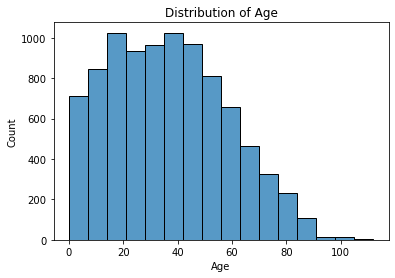

In [173]:
age_bin_width =(cd['Age'].max() - cd['Age'].min())/15
age_bin_width = int(age_bin_width)
sns.histplot(x=cd['Age'], binwidth=age_bin_width)
plt.title('Distribution of Age')

In [174]:
female = cd[cd['Gender'] == 'Female']
male = cd[cd['Gender'] == 'Male']

Text(0.5, 1.0, 'Distribution of Age by Male')

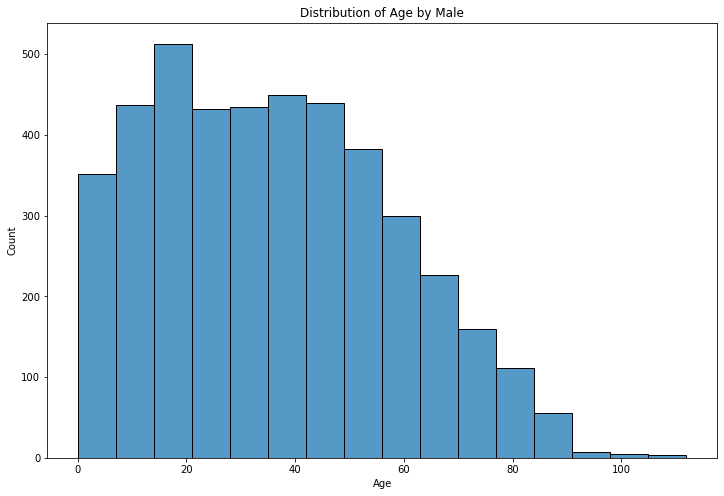

In [175]:
plt.figure(figsize=(12,8))
sns.histplot(x=male['Age'], binwidth=age_bin_width)
plt.title('Distribution of Age by Male')

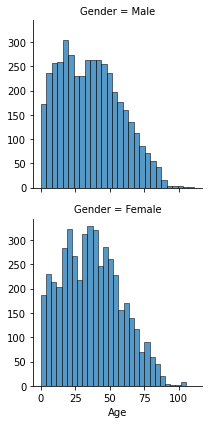

In [176]:
g = sns.FacetGrid(row = 'Gender', data = cd)
g.map(sns.histplot, 'Age')


<AxesSubplot:xlabel='Age', ylabel='Count'>

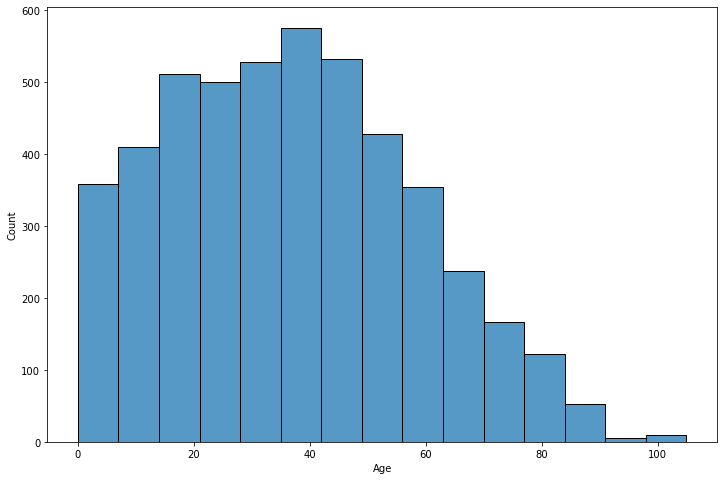

In [177]:
plt.figure(figsize=(12,8))
sns.histplot(x=female['Age'],binwidth=age_bin_width)

# __Age Distribution by Religion__

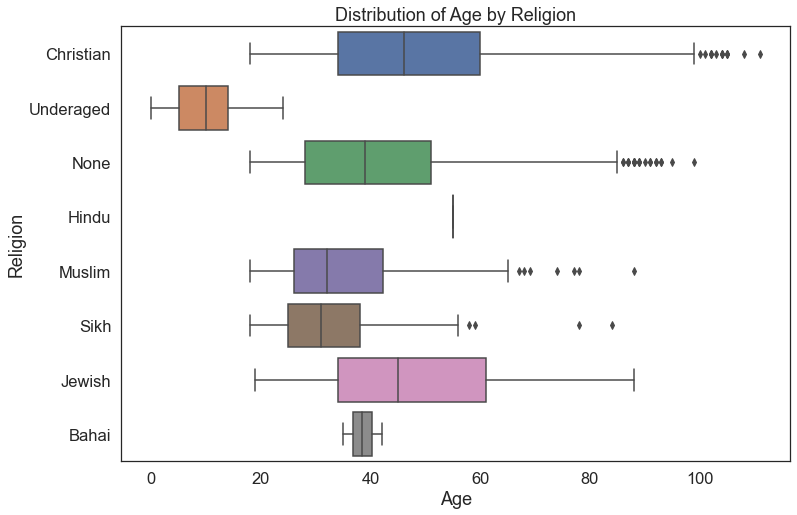

In [178]:
sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.5, style='white')
sns.boxplot(data=cd, x ='Age', y='Religion',)
plt.title('Distribution of Age by Religion')
plt.show()

# __Unemployed count by Age__

Text(0.5, 1.0, 'Unemployed Count by Age')

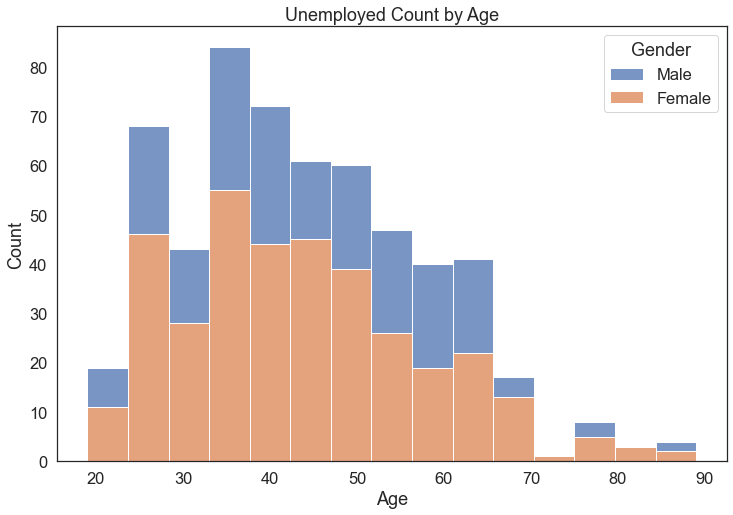

In [179]:
sns.histplot(data = unemployed, x = 'Age', hue = 'Gender', multiple = 'stack')
plt.title('Unemployed Count by Age')

# Distribution of Marital Status by Age

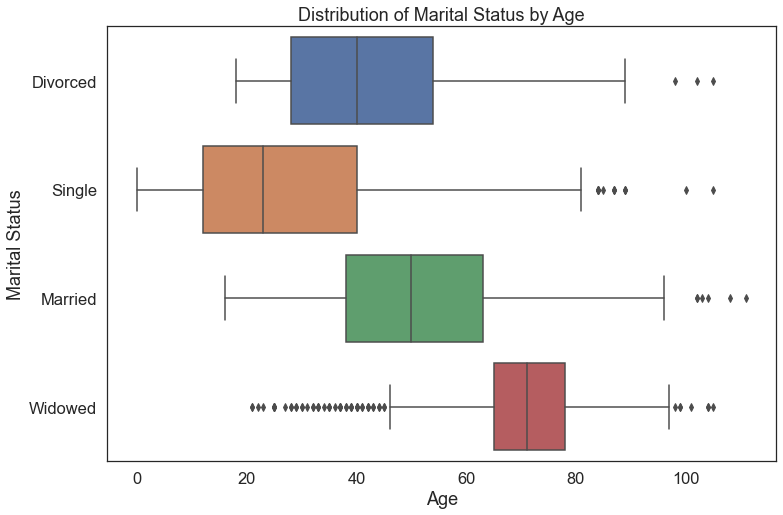

In [180]:
sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.5, style='white')
sns.boxplot(data=cd, x ='Age', y='Marital Status',)
plt.title('Distribution of Marital Status by Age')
plt.show()

# Gender and Marital Status

In [181]:
#emigrants (migration out) = divorced male
# To get emigrants, group by Marital Status and Gender
print("Groups in Marital Status by Gender:")
Msgen_groups = cd.groupby(["Marital Status","Gender"])
for group_key, group_value in Msgen_groups:
    Msgen_group = Msgen_groups.get_group(group_key)
    #print("Count of each group:")
    Msgen_grouped = cd.groupby(["Marital Status", "Gender"]
                                     ).size().reset_index(name="Count")
print(Msgen_grouped)

Groups in Marital Status by Gender:
  Marital Status  Gender  Count
0       Divorced  Female    502
1       Divorced    Male    338
2        Married  Female   1221
3        Married    Male   1212
4         Single  Female   2859
5         Single    Male   2610
6        Widowed  Female    211
7        Widowed    Male    146


<AxesSubplot:xlabel='Age', ylabel='Marital Status'>

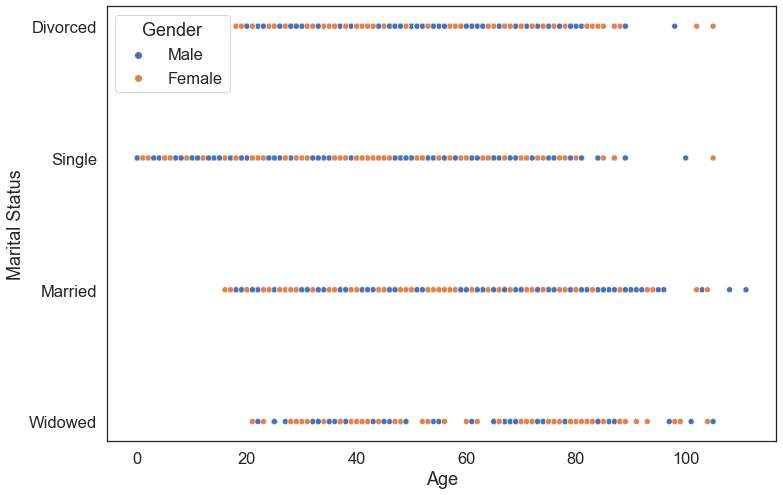

In [182]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=cd, x='Age', y='Marital Status', hue='Gender')

# Age Pyramid

In [183]:
one=0
ten=0
twenty=0
thirty=0
fourty=0
fifty=0
sixty=0
seventy=0
eighty=0
ninty=0
hundred=0

for m in male['Age']:
    if m <= 9:
        one +=1
    elif m >= 10 and m <= 19:
        ten += 1
    elif m >= 20 and m <= 29:
        twenty += 1
    elif m >= 30 and m <= 39:
        thirty += 1
    elif m >= 40 and m <= 49:
        fourty += 1
    elif m >= 50 and m <= 59:
        fifty += 1
    elif m >= 60 and m <= 69:
        sixty += 1
    elif m >= 70 and m <= 79:
        seventy += 1
    elif m >= 80 and m <= 89:
        eighty += 1
    elif m >= 90 and m <= 99:
        ninty += 1
    elif m >= 100:
        hundred += 1
male_data = [one,ten,twenty,thirty,fourty,fifty,sixty,seventy,eighty,ninty,hundred]
male_data = [(-1)*m for m in male_data]
male_data.reverse()

In [184]:
one=0
ten=0
twenty=0
thirty=0
fourty=0
fifty=0
sixty=0
seventy=0
eighty=0
ninty=0
hundred=0

for f in female['Age']:
    if f <= 9:
        one +=1
    elif f >= 10 and f <= 19:
        ten += 1
    elif f >= 20 and f <= 29:
        twenty += 1
    elif f >= 30 and f <= 39:
        thirty += 1
    elif f >= 40 and f <= 49:
        fourty += 1
    elif f >= 50 and f <= 59:
        fifty += 1
    elif f >= 60 and f <= 69:
        sixty += 1
    elif f >= 70 and f <= 79:
        seventy += 1
    elif f >= 80 and f <= 89:
        eighty += 1
    elif f >= 90 and f <= 99:
        ninty += 1
    elif f >= 100:
        hundred += 1
female_data = [one,ten,twenty,thirty,fourty,fifty,sixty,seventy,eighty,ninty,hundred]
female_data.reverse()

In [185]:
plt.figure()
%matplotlib inline

In [186]:
age_p =pd.DataFrame({'Male':male_data, 'Female':female_data, 'Age':['100+', '99-90','89-80','79 - 70','69 - 60','59 - 50', '49 - 40','39 -30', '29 - 20','19 - 10','9 - 0']})
order =['100+', '99-90','89-80','79 - 70','69 - 60','59 - 50','49 - 40','39 -30', '29 - 20','19 - 10','9 - 0']

Text(0.5, 1.0, 'Age Pyramid')

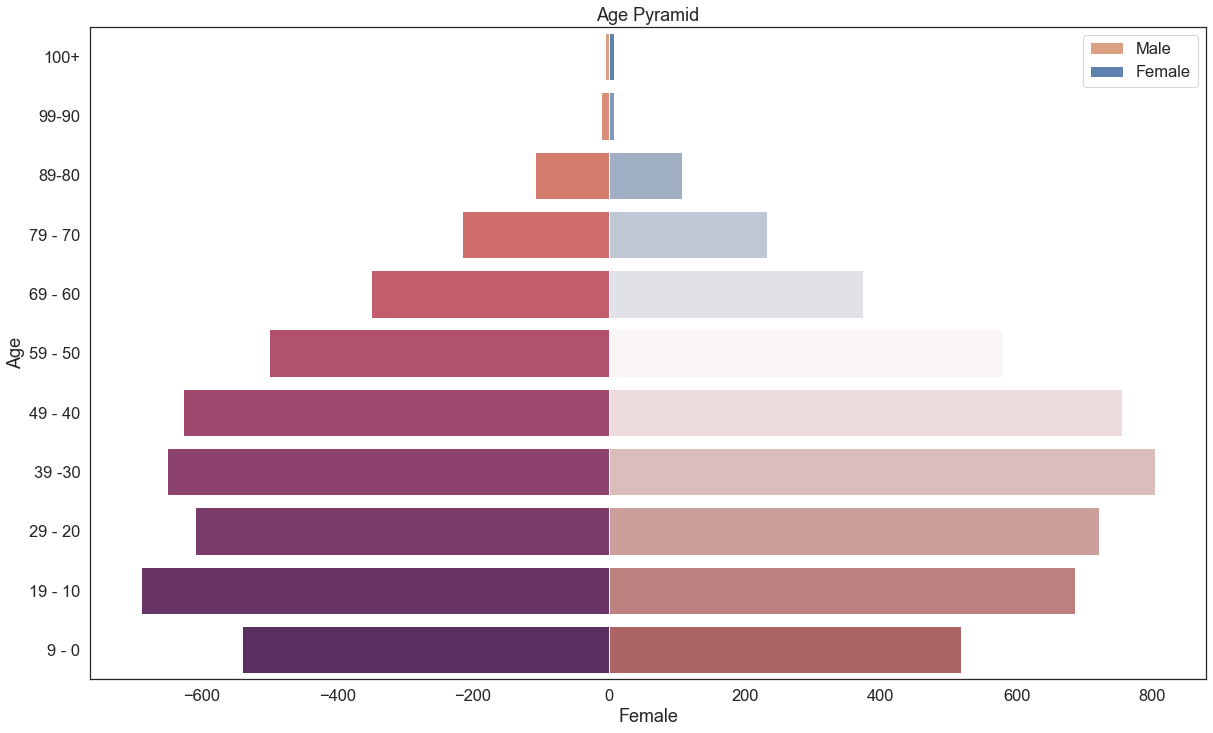

In [187]:
plt.figure(figsize=(20,12))
age_pyramid = sns.barplot(data=age_p, x='Male', y = 'Age', label = 'Male', color = 'DarkBlue', order = order, palette='flare')
age_pyramid = sns.barplot(data=age_p,x = 'Female', y ='Age', color = ('pink'), label = 'Female', order = order,palette='vlag' )
age_pyramid.legend()
plt.title('Age Pyramid')

# Religion Count

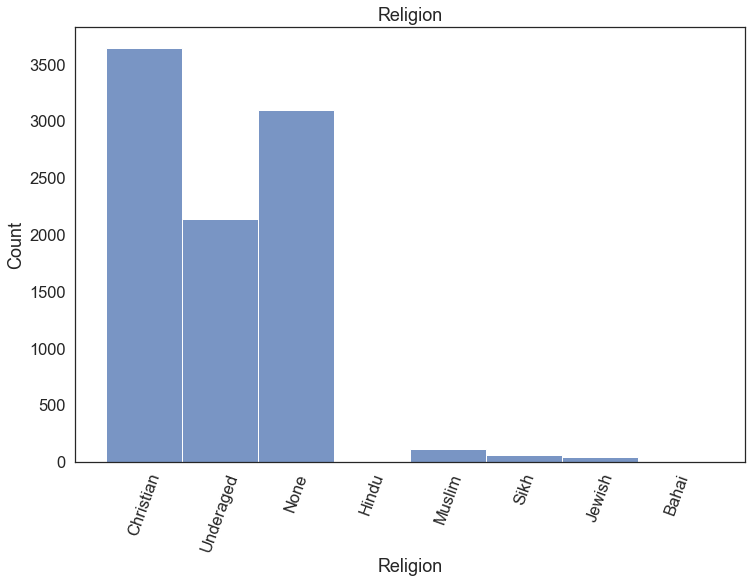

In [188]:
plt.figure(figsize=(12,8))
sns.histplot(data=cd, x='Religion')
plt.title('Religion')
plt.xticks(rotation=70)
plt.show()


# Relationship to Head of House

Text(0.5, 1.0, 'Relationship to Head of House')

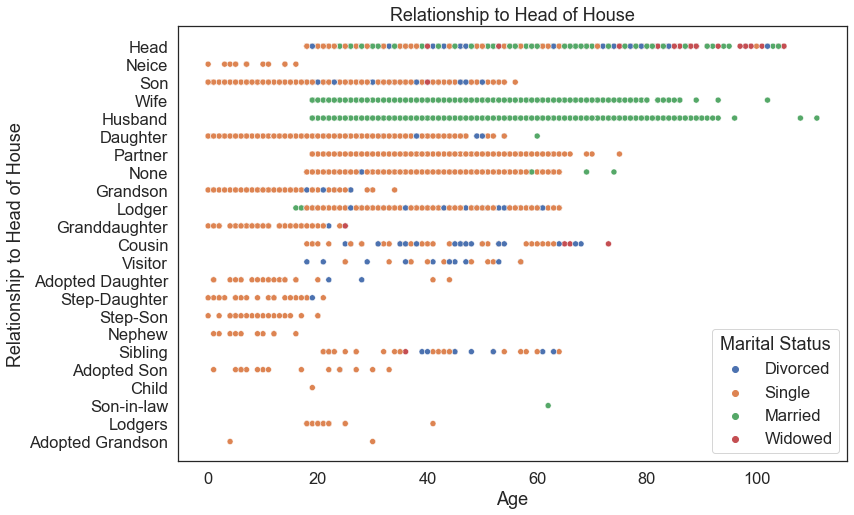

In [189]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=cd, x='Age', y='Relationship to Head of House', hue='Marital Status')
plt.title('Relationship to Head of House')

# Data Analysis

# __Crude Birth Rate__

In [190]:
totalpopulation = len(cd)

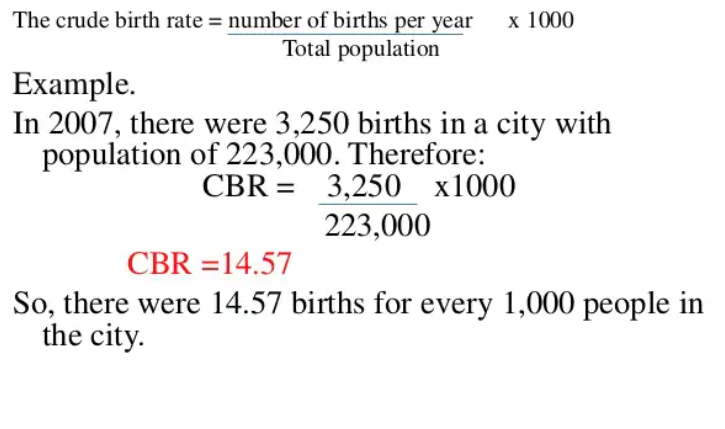# 

In [191]:
#Calculating the birth rate
babies_at_zero = len(cd[cd['Age'] == 0])
babies_at_four = len(cd[cd['Age'] == 4])
babies_at_eight = len(cd[cd['Age'] == 8])
total_population = len(cd)
crude_br = (babies_at_zero /total_population)*1000 
print(crude_br)

9.891196834817013


# __Age Specific Fertility Rate__

In [192]:
# define women of childbearing age between 25 - 29 years
birth_age_2529 = len(cd[cd['Age'] == 0])
age_2529 = (cd['Age'].between(25,29)) & (cd['Gender'] == 'Female')
age_2529 = len(cd[age_2529])

print((birth_age_2529/age_2529)*1000)

247.25274725274727


In [193]:
## define women of childbearing age between 30 - 34 years
birth_age_3034 = len(cd[cd['Age'] == 4])
age_3034 = (cd['Age'].between(30,34)) & (cd['Gender'] == 'Female')
age_3034= len(cd[age_3034])

print((birth_age_3034/age_3034)*1000)

280.5194805194805


In [194]:
## define women of childbearing age between 35 - 40 years
birth_age_3540 = len(cd[cd['Age'] == 8])
age_3540 = (cd['Age'].between(35,40)) & (cd['Gender'] == 'Female')
age_3540= len(cd[age_3540])

print((birth_age_3540/age_3540)*1000)

223.32015810276678


# __General Fertility Rate__

In [195]:
total_birth = babies_at_zero + babies_at_four + babies_at_eight
child_birth_age = age_2529 + age_3034 + age_3540

gfr = total_birth/child_birth_age

print(f"General Fertility Rate: {gfr*1000}")

General Fertility Rate: 247.80876494023903


__Crude Death Rate__

# 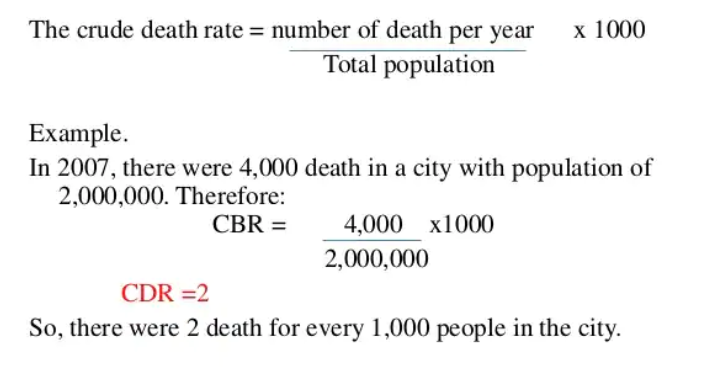

In [196]:
aging_pop = cd[cd['Age'].between(65,120)].groupby('Age').size().sort_index(ascending=False)
aging_pop

Age
111     1
108     1
105     3
104     3
103     1
102     3
101     1
100     1
99      2
98      2
97      1
96      1
95      1
94      1
93      3
92      2
91      3
90      2
89     15
88     12
87     14
86      9
85     19
84     37
83     21
82     30
81     27
80     32
79     38
78     42
77     43
76     39
75     39
74     47
73     46
72     43
71     54
70     57
69     63
68     56
67     58
66     66
65     71
dtype: int64

In [197]:
# shift the ages up one to mimic last year's 'counts' per age

calculated_ages = aging_pop.shift(-1)
calculated_ages

Age
111     1.0
108     3.0
105     3.0
104     1.0
103     3.0
102     1.0
101     1.0
100     2.0
99      2.0
98      1.0
97      1.0
96      1.0
95      1.0
94      3.0
93      2.0
92      3.0
91      2.0
90     15.0
89     12.0
88     14.0
87      9.0
86     19.0
85     37.0
84     21.0
83     30.0
82     27.0
81     32.0
80     38.0
79     42.0
78     43.0
77     39.0
76     39.0
75     47.0
74     46.0
73     43.0
72     54.0
71     57.0
70     63.0
69     56.0
68     58.0
67     66.0
66     71.0
65      NaN
dtype: float64

In [198]:
# calculate the difference between our two sets

diff = aging_pop - calculated_ages

# change it to a dataframe...

diff = diff.reset_index(name='Count')

# only interested in deaths - not emigration!! So we want minus counts only

deaths = diff[diff['Count'] < 0]
deaths

,Age,Count
1,108,-2.0
4,103,-2.0
7,100,-1.0
13,94,-2.0
15,92,-1.0
17,90,-13.0
19,88,-2.0
21,86,-10.0
22,85,-18.0
24,83,-9.0


In [199]:
#Claculating the death rate
death_rate = abs(((deaths['Count']).sum())/total_population)*1000
death_rate

13.078360259369163

In [200]:
Age_counts = cd['Age Class'].value_counts().sort_index(ascending=False)
Age_counts

100+       14
90-99      18
80-89     216
70-79     448
60-69     724
50-59    1080
40-49    1382
30-39    1454
20-29    1330
10-19    1375
0-9      1058
Name: Age Class, dtype: int64

In [201]:
Age_counts2 = Age_counts.shift(-1)
Age_counts2

100+       18.0
90-99     216.0
80-89     448.0
70-79     724.0
60-69    1080.0
50-59    1382.0
40-49    1454.0
30-39    1330.0
20-29    1375.0
10-19    1058.0
0-9         NaN
Name: Age Class, dtype: float64

In [202]:
diff1 = Age_counts - Age_counts2
diff1

100+      -4.0
90-99   -198.0
80-89   -232.0
70-79   -276.0
60-69   -356.0
50-59   -302.0
40-49    -72.0
30-39    124.0
20-29    -45.0
10-19    317.0
0-9        NaN
Name: Age Class, dtype: float64

# __Crude Growth Rate__



In [203]:
#Calculating Growth Rate
print(f"CGR {crude_br - death_rate}")
print(f"CGR as Percentage {(crude_br-death_rate)/10}%")

CGR -3.18716342455215
CGR as Percentage -0.31871634245521496%


# __Population Change__


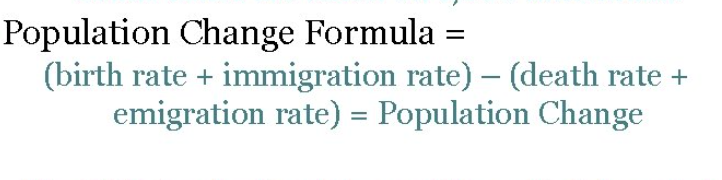

__Immigration and Emmigration__

In [204]:
#immigrants = number of lodgers + visitors
lodgers = len(cd[(cd['Relationship to Head of House'] == 'Lodger') & (cd['Marital Status']=='Single')])
visitors = len(cd[cd['Relationship to Head of House'] == 'Visitor'])
immigrants = lodgers + visitors
immigrants
immigrants_by_1000 = immigrants/1000 * 100
immigrants_by_1000

29.7

In [205]:
#emigrants (migration out) = divorced male
# To get emigrants, group by Marital Status and Gender
print("Groups in Marital Status by Gender:")
Msgen_groups = cd.groupby(["Marital Status","Gender"])
for group_key, group_value in Msgen_groups:
    Msgen_group = Msgen_groups.get_group(group_key)
    #print("Count of each group:")
    Msgen_grouped = cd.groupby(["Marital Status", "Gender"]
                                     ).size().reset_index(name="Count")
print(Msgen_grouped)

Groups in Marital Status by Gender:
  Marital Status  Gender  Count
0       Divorced  Female    502
1       Divorced    Male    338
2        Married  Female   1221
3        Married    Male   1212
4         Single  Female   2859
5         Single    Male   2610
6        Widowed  Female    211
7        Widowed    Male    146


In [206]:
#emmigrants is difference between female divorced and male divorced
emmigrants = 502 - 338
emmigrants
emmigrants_by_1000 = (emmigrants/total_population)*1000
print(f"emmigrant per 1000: {emmigrants_by_1000}")

emmigrant per 1000: 18.023958676777667


In [207]:
#Calculate the populate  change
Population_Change = (immigrants_by_1000 + crude_br ) - (emmigrants_by_1000 + death_rate)
Population_Change

8.488877898670182

# Occupancy Rates   

In [208]:
# brief method to show occupancy rates

household_occs = cd.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Rate')
household_occs

,House Number,Street,Occupancy Rate
0,1,Anderson Avenue,3
1,1,Austin Drive,5
2,1,Bangorfold Lane,2
3,1,Banktap Road,3
4,1,Barbican Plaza,1
...,...,...,...
3220,230,Goldfinch Islands,4
3221,231,Goldfinch Islands,5
3222,232,Goldfinch Islands,3
3223,233,Goldfinch Islands,3


In [209]:
#Checking the count of the occupancy
household_occs.groupby('Occupancy Rate').count()

,House Number,Street
Occupancy Rate,,
1,861,861
2,893,893
3,548,548
4,385,385
5,373,373
6,72,72
7,18,18
8,12,12
9,13,13


In [210]:
##Checking the mean, median, var and std
household_occs.agg([np.mean,np.median,np.var,np.std])

,House Number,Occupancy Rate
mean,42.043411,2.821395
median,26.000000,2.000000
var,2217.120323,4.028885
std,47.086307,2.007208


In [211]:
#The mean of the of the occupancy rate is 3
over_crowded = 385 + 373 + 72 + 18 + 12 + 13 + 16 + 9 + 11 + 1 + 1 + 3 + 1 + 2 + 4 + 1 + 1
over_crowded

923

In [212]:
#Houseshold below 2
not_over_crowded = 861 + 893
not_over_crowded

1754

In [213]:
#Ratio of overcrowded and not over crowded
ratio = 923/1754 
ratio

0.5262257696693272

In [214]:
#Percentage of overcrowded 
percentage = ratio * 100
percentage

52.62257696693272

In [215]:
number_of_lodger = len(cd[(cd['Relationship to Head of House'] == 'Lodger')])
number_of_lodger

368

In [216]:
number_of_visitor = len(cd[(cd['Relationship to Head of House'] == 'Visitor')])
number_of_visitor

22

In [217]:
high_density_building = number_of_lodger + number_of_visitor
high_density_building

390

# Assumed Commuters

In [218]:
#Using this to pick random employed commuters
commuters = cd[cd['Age'].between(18,65)]
commuters['Occupation'].unique()

array(['Teacher, early years/pre', 'Radio broadcast assistant',
       'University Student', 'Information systems manager',
       'Administrator, sports', 'Forensic scientist', 'Unemployed',
       'Engineer, production', 'Dispensing optician', 'Paramedic',
       'Catering manager', 'Charity fundraiser', 'Aid worker',
       'Customer service manager', 'Banker', 'Contractor',
       'Waste management officer', 'Translator', 'Herpetologist',
       'Journalist, broadcasting', 'Designer, multimedia', 'Video editor',
       'Field trials officer', 'Higher education careers adviser',
       'Programme researcher, broadcasting/film/video',
       'Forest/woodland manager', 'Market researcher',
       'Trading standards officer', 'Production assistant, television',
       'Designer, blown glass/stained glass', 'Engineer, land',
       'Holiday representative', 'Copywriter, advertising',
       'Medical illustrator', 'Engineer, manufacturing',
       'Chartered public finance accountant',
 

In [219]:
#Randomly picked number of assumed commuters

assumed_commuters = len(cd[cd['Occupation'].isin(['University Student', 'Information systems manager',
       'Administrator, sports', 'Forensic scientist', 'Unemployed',
       'Engineer, production', 'Dispensing optician', 'Paramedic',
       'Catering manager', 'Charity fundraiser','Designer, multimedia', 'Video editor',
       'Field trials officer', 'Higher education careers adviser',
       'Programme researcher, broadcasting/film/video',
       'Forest/woodland manager', 'Market researcher',
       'Trading standards officer', 'Production assistant, television',
       'Designer, blown glass/stained glass', 'Engineer, land',
       'Holiday representative', 'Copywriter, advertising',
       'Medical illustrator', 'Engineer, manufacturing',
       'Chartered public finance accountant',
       'Administrator, local government', 'Archaeologist',
       'Pension scheme manager', 'Ecologist', 'Paediatric nurse',
       'Music therapist', 'Probation officer', 'Field seismologist',
       'Theme park manager', 'Cytogeneticist', 'Meteorologist', 'Actuary',
       'Analytical chemist', 'Information officer', 'Structural engineer',
       'Visual merchandiser', 'Theatre stage manager', 'Podiatrist',
       'Camera operator', 'Insurance account manager', 'Engineer, energy',
       'Transport planner',
       'Product/process development scientist', 'Quantity surveyor',
       'Social worker', 'Education officer, museum',
       'Journalist, newspaper', 'Solicitor, Scotland',
       'Museum education officer', 'Journalist, magazine',
       'Restaurant manager', 'Designer, interior/spatial',
       'Wellsite geologist',
       'Chief Strategy Officer', 'Airline pilot', 'Oncologist',
       'Mining engineer', 'Pharmacist, hospital',
       "Politician's assistant", 'Museum/gallery exhibitions officer',
       'Academic librarian', 'Equality and diversity officer',
       'Lecturer, higher education', 'Counselling psychologist',
       'Radiation protection practitioner',
       'Historic buildings inspector/conservation officer', 'Geochemist',
       'Audiological scientist', 'General practice doctor',
       'Sound technician, broadcasting/film/video', 'Editorial assistant',
       'Administrator, arts', 'Database administrator',
       'Personnel officer', 'Management consultant',
       'Engineer, automotive',])])






print(F"Number of assumed commuters is {assumed_commuters}")

Number of assumed commuters is 1883


In [220]:
#Percentage of assumed commuters
total_population = len(cd)
percenatage_assumed_commuters = assumed_commuters/total_population * 100
percenatage_assumed_commuters

20.69458182217826

# Unemployment and Training

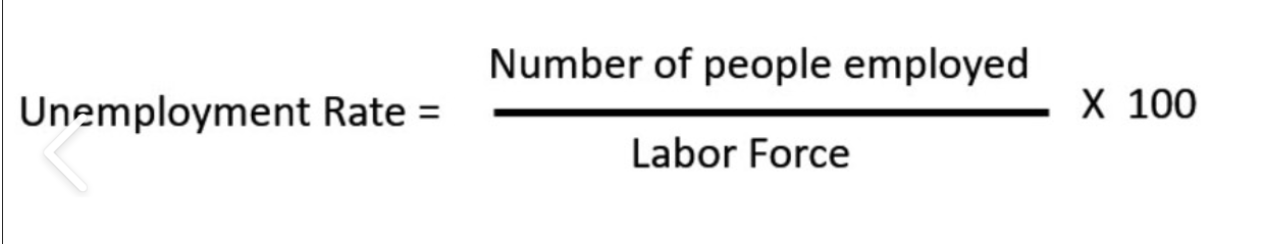

In [221]:
#To calculate the unemployed number of the population
unemployed = len(cd[cd['Occupation_Bar'] == 'Unemployed'])
unemployed

568

In [222]:
##To calculate the employed number of the population
employed = len(cd[cd['Occupation_Bar'] =='Employed'])
employed

4878

In [223]:
##To calculate the working population and unemployed ratio
working_population = unemployed + employed
unemployed_ratio = (unemployed/working_population) * 100
unemployed_ratio

10.429673154608887

In [224]:
##To calculate the unemployed age classs counts
unemployed = cd[cd['Occupation_Bar'] == 'Unemployed']
unemployed['Age Class'].value_counts()

30-39    146
40-49    145
50-59    101
20-29     95
60-69     64
70-79      9
80-89      7
10-19      1
0-9        0
90-99      0
100+       0
Name: Age Class, dtype: int64

In [225]:
#Viewing the profile of the dat

import pandas_profiling as pf
pf.ProfileReport(cd).to_file('census_04.csv.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

__Reccomendation__

 - Given the occupancy rate of the town, the town is overcrowded. There is also a potential for families who may need to downsize due to the divorce rates. Therefore, investing on low density housing in the town should be a priority. This will go a long way to reduce the strain on current housing situation and ultimately reduce overcrowding.
 - There is a dearth of employment for people within the age class 30-39 and 40-49. There is a potential loss of income as a result of unemployment. This age class is within the age that is deemed able to work, thus, it would be prudent to create job centers or vocational centers which will be useful in retraining those who fall into this category. This will ultimately increase employability and income within that group.
 - Concerning the overall age range, although the birth rate is low at the time, more people are within the middle age group and fewer people in the elderly age group. Although infirmity rate is quite low at the time, based on the current age trend, it is assumed that more people in the middle age group will live long to old age. Therefore, it is not out of place to plan towards developing care homes and hospitals to further promote health as these people are predicted to live to old age.
 - Finally, there is an increase in commuters within the town, in the long term, building a train station would be recommended to ease the stress off the roads. The population is a young and growing population with a potential to expand rapidly, therefore, having a train station to handle to potential commuter stress should be considered.